In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

importing our data

In [2]:
life_ex = pd.read_excel('IHME_USA_LIFE_EXPECTANCY_1987_2007_Y2011M06D16.XLSX')
country_complete = pd.read_csv('county_complete.csv')
landarea = pd.read_csv('5296US_landarea.csv')
waterarea = pd.read_csv('5296US_waterarea.csv')

<b>Question A:</b>

plotting relevant graphs:

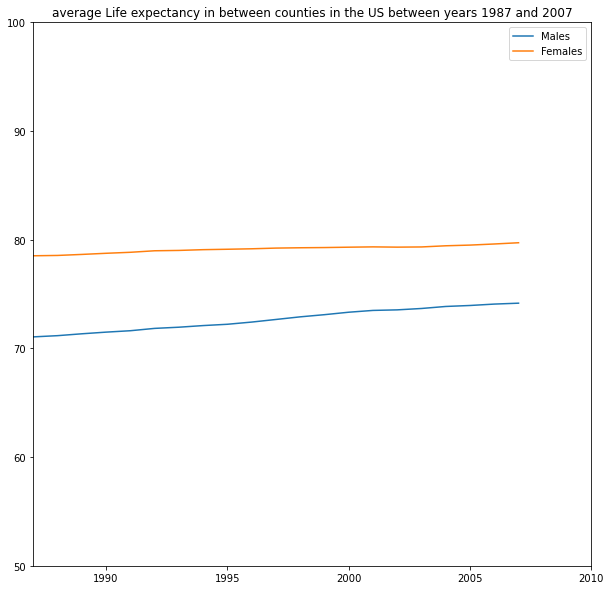

In [3]:
life_ex_male_female=life_ex.iloc[:,[3,4,6]]
life_ex_male_female = life_ex_male_female.groupby(["Year"]).mean().reset_index()
# plot lines
plt.figure(figsize = (10,10))
plt.plot(life_ex_male_female["Year"], life_ex_male_female["Male life expectancy (years)"], label = "Males")
plt.plot(life_ex_male_female["Year"], life_ex_male_female["Female life expectancy (years)"], label = "Females")
plt.ylim(50,100)
plt.xlim(1987,2010)

plt.title("average Life expectancy in between counties in the US between years 1987 and 2007")
plt.legend()
plt.show()


first of all this graph helps us with understanding the data for section B - since we get an overall view of the data we need to use in that section. aside from that when we plotted this graph we though it may help us with our predictions in C and D since age might correlate to someone choosing sides in elections (be it republican or democrates) since old people tend to be more conservative than young people.

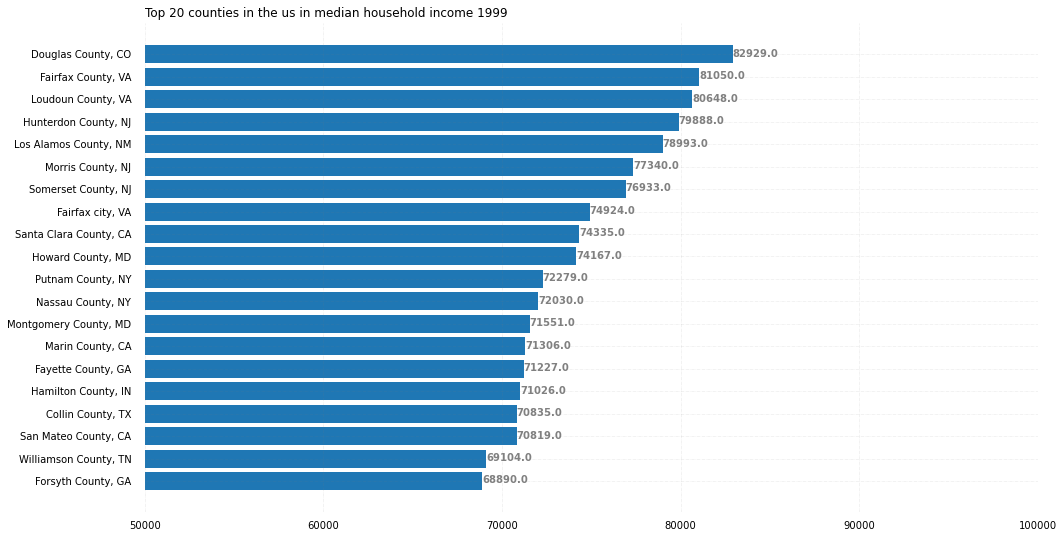

In [4]:
county1=pd.read_csv('county1.csv')
county1=county1.iloc[7:-13,:2]
county1.columns=["county","1999_median_income"]
county1["1999_median_income"] = county1.apply(lambda x:float(str(x["1999_median_income"]).replace(',','',)) if str(x["1999_median_income"]).find(",")>0 else 0,axis=1)
county1=county1.sort_values(by="1999_median_income",ascending=False)
county = county1['county'].head(20)
median = county1['1999_median_income'].head(20)
fig, ax = plt.subplots(figsize =(16, 9))
plt.xlim(50000,100000)
ax.barh(county, median)
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
ax.invert_yaxis()
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
ax.set_title('Top 20 counties in the us in median household income 1999',
             loc ='left', )
plt.show()




this plot gives us a sense of the economic data we have - here we can see which states are doing the best financially, which in turn might correlate to the election results we'll be predicting in C and D

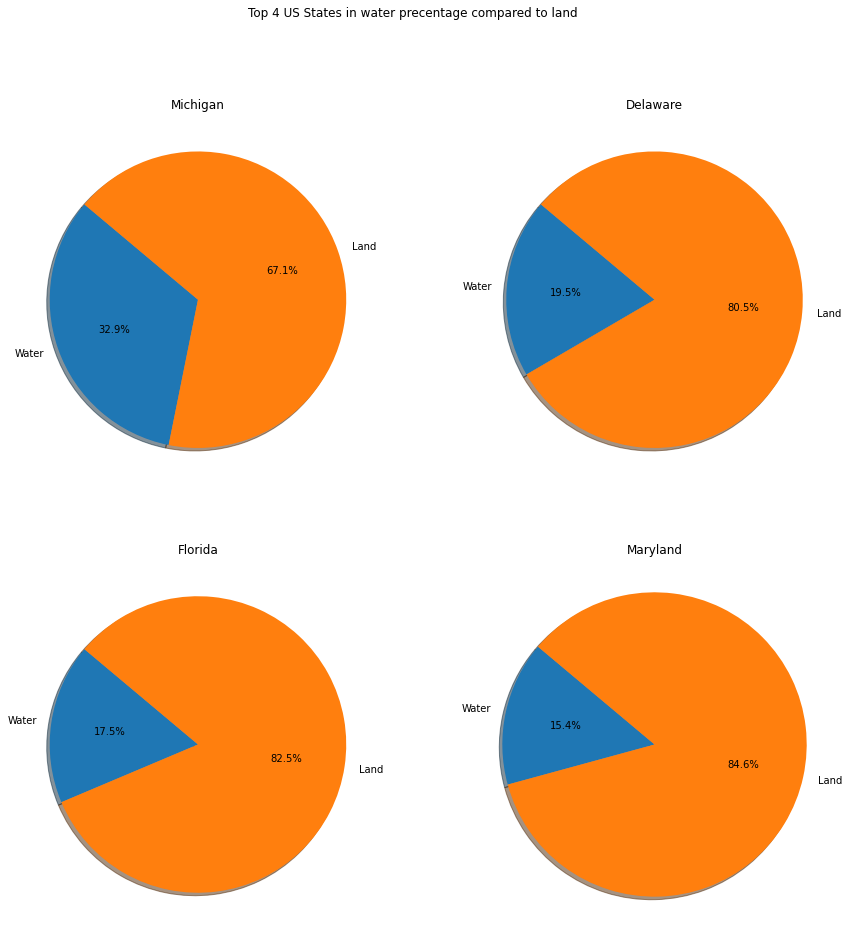

In [5]:

water_state=waterarea.groupby(["State"]).mean().reset_index().drop("FIPS",axis=1).drop(7)#nan
land_state=landarea.groupby(["State"]).mean().reset_index().drop("FIPS",axis=1)
water_land = pd.merge(water_state, land_state,  how='inner', left_on='State',right_on="State")
water_land["water_prec"]=water_land.apply(lambda x:x["Water Area"]/(x["Water Area"]+x["Land Area"]),axis=1)
water_land=water_land.sort_values(by="water_prec",ascending=False)
water_land.reset_index(drop=True, inplace=True)
fig, axs = plt.subplots(2, 2,figsize=(15,15))
fig.suptitle('Top 4 US States in water precentage compared to land')
labels = ['Water', 'Land']
sizes = [water_land["Water Area"][0], water_land["Land Area"][0]]
axs[0,0].pie(sizes, labels=labels, 
        autopct='%1.1f%%', shadow=True, startangle=140)
axs[0,0].set_title(water_land["State"][0])
plt.axis('equal')
sizes = [water_land["Water Area"][1], water_land["Land Area"][1]]
axs[0,1].pie(sizes, labels=labels, 
        autopct='%1.1f%%', shadow=True, startangle=140)
axs[0,1].set_title(water_land["State"][1])
plt.axis('equal')
sizes = [water_land["Water Area"][2], water_land["Land Area"][2]]
axs[1,0].pie(sizes, labels=labels, 
        autopct='%1.1f%%', shadow=True, startangle=140)
axs[1,0].set_title(water_land["State"][2])
plt.axis('equal')
sizes = [water_land["Water Area"][3], water_land["Land Area"][3]]
axs[1,1].pie(sizes, labels=labels, 
        autopct='%1.1f%%', shadow=True, startangle=140)
axs[1,1].set_title(water_land["State"][3])
plt.show() 



this plot gives us a direction on which state has the biggest ratio between land to water area - this can help us get a sense of the data we'll be using in section B. we ended up no using this data at all because after we saw the graphs we felt that it was useless in our case.

Now we start with our pre-processing:

<b>note:</b> since the data didn't have a lot of missing values we did not have to do too much pre-processing on the data, and most of our pre-processing was to merge tables together, pick features and calculations to fill in year gaps.

we did not use a uniform pre-processing for all of the questions, rather we pre-processed the data before every question.

<b>Question B:</b>

we started by dealing the missing values, in order to create our heatmap. since the heatmap can help us understand which features to keep and which features to drop.

In [6]:
life_ex1=life_ex.loc[(life_ex.State=="CALIFORNIA") | (life_ex.State=="FLORIDA")| (life_ex.State=="SOUTH DAKOTA")| (life_ex.State=="WYOMING")]
life_ex1=life_ex1.iloc[:,[0,1,4,5,6,7,8,9,16,17,18,19,20,21,22,23]]# life_ex
def toint(num):
    if(num=="50+"):
        return 60
    else: return int(num)
life_ex1["Years behind international frontier (male)"]=life_ex1["Years behind international frontier (male)"].apply(toint)
life_ex1["Years behind international frontier (female)"]=life_ex1["Years behind international frontier (female)"].apply(toint)
country_complete

,fips,state,name,pop2000,pop2010,pop2011,pop2012,pop2013,pop2014,pop2015,pop2016,pop2017,age_under_5_2010,age_under_5_2017,age_under_18_2010,age_over_65_2010,age_over_65_2017,median_age_2017,female_2010,white_2010,black_2010,black_2017,native_2010,native_2017,asian_2010,asian_2017,pac_isl_2010,pac_isl_2017,other_single_race_2017,two_plus_races_2010,two_plus_races_2017,hispanic_2010,hispanic_2017,white_not_hispanic_2010,white_not_hispanic_2017,speak_english_only_2017,no_move_in_one_plus_year_2010,foreign_born_2010,foreign_spoken_at_home_2010,women_16_to_50_birth_rate_2017,hs_grad_2010,hs_grad_2016,hs_grad_2017,some_college_2016,some_college_2017,bachelors_2010,bachelors_2016,bachelors_2017,veterans_2010,veterans_2017,mean_work_travel_2010,mean_work_travel_2017,broadband_2017,computer_2017,housing_units_2010,homeownership_2010,housing_multi_unit_2010,median_val_owner_occupied_2010,households_2010,households_2017,persons_per_household_2010,persons_per_household_2017,per_capita_income_2010,per_capita_income_2017,metro_2013,median_household_income_2010,median_household_income_2016,median_household_income_2017,private_nonfarm_establishments_2009,private_nonfarm_employment_2009,percent_change_private_nonfarm_employment_2009,nonemployment_establishments_2009,firms_2007,black_owned_firms_2007,native_owned_firms_2007,asian_owned_firms_2007,pac_isl_owned_firms_2007,hispanic_owned_firms_2007,women_owned_firms_2007,manufacturer_shipments_2007,mercent_whole_sales_2007,sales_2007,sales_per_capita_2007,accommodation_food_service_2007,building_permits_2010,fed_spending_2009,area_2010,density_2010,smoking_ban_2010,poverty_2010,poverty_2016,poverty_2017,poverty_age_under_5_2017,poverty_age_under_18_2017,civilian_labor_force_2007,employed_2007,unemployed_2007,unemployment_rate_2007,civilian_labor_force_2008,employed_2008,unemployed_2008,unemployment_rate_2008,civilian_labor_force_2009,employed_2009,unemployed_2009,unemployment_rate_2009,civilian_labor_force_2010,employed_2010,unemployed_2010,unemployment_rate_2010,civilian_labor_force_2011,employed_2011,unemployed_2011,unemployment_rate_2011,civilian_labor_force_2012,employed_2012,unemployed_2012,unemployment_rate_2012,civilian_labor_force_2013,employed_2013,unemployed_2013,unemployment_rate_2013,civilian_labor_force_2014,employed_2014,unemployed_2014,unemployment_rate_2014,civilian_labor_force_2015,employed_2015,unemployed_2015,unemployment_rate_2015,civilian_labor_force_2016,employed_2016,unemployed_2016,unemployment_rate_2016,uninsured_2017,uninsured_age_under_6_2017,uninsured_age_under_19_2017,uninsured_age_over_74_2017,civilian_labor_force_2017,employed_2017,unemployed_2017,unemployment_rate_2017,age_over_18_2019,age_over_65_2019,age_over_85_2019,age_under_5_2019,asian_2019,avg_family_size_2019,bachelors_2019,black_2019,hispanic_2019,household_has_broadband_2019,household_has_computer_2019,household_has_smartphone_2019,households_2019,households_speak_asian_or_pac_isl_2019,households_speak_limited_english_2019,households_speak_other_2019,households_speak_other_indo_euro_lang_2019,households_speak_spanish_2019,housing_mobile_homes_2019,housing_one_unit_structures_2019,housing_two_unit_structures_2019,hs_grad_2019,mean_household_income_2019,mean_work_travel_2019,median_age_2019,median_household_income_2019,median_individual_income_2019,median_individual_income_age_25plus_2019,native_2019,other_single_race_2019,pac_isl_2019,per_capita_income_2019,persons_per_household_2019,pop_2019,poverty_2019,poverty_65_and_over_2019,poverty_under_18_2019,two_plus_races_2019,unemployment_rate_2019,uninsured_2019,uninsured_65_and_older_2019,uninsured_under_19_2019,uninsured_under_6_2019,veterans_2019,white_2019,white_not_hispanic_2019
0,1001,Alabama,Autauga County,43671.0,54571,55199.0,54927.0,54695.0,54864.0,54838.0,55278.0,55504.0,6.6,5.7,26.8,12.0,14.3,37.8,51.3,78.5,17.7,9.55,0.4,0.15,0.9,0.47,NaN,0.04,0.65,1.6,0.84,2.4,2.67,77.2,75.42,96.2,86.3,2.0,3.7,7.4,85.3,87.6,87.7,28.7,29.1,21.7,24.6,25.0,5817,12.6

creating our heatmap:

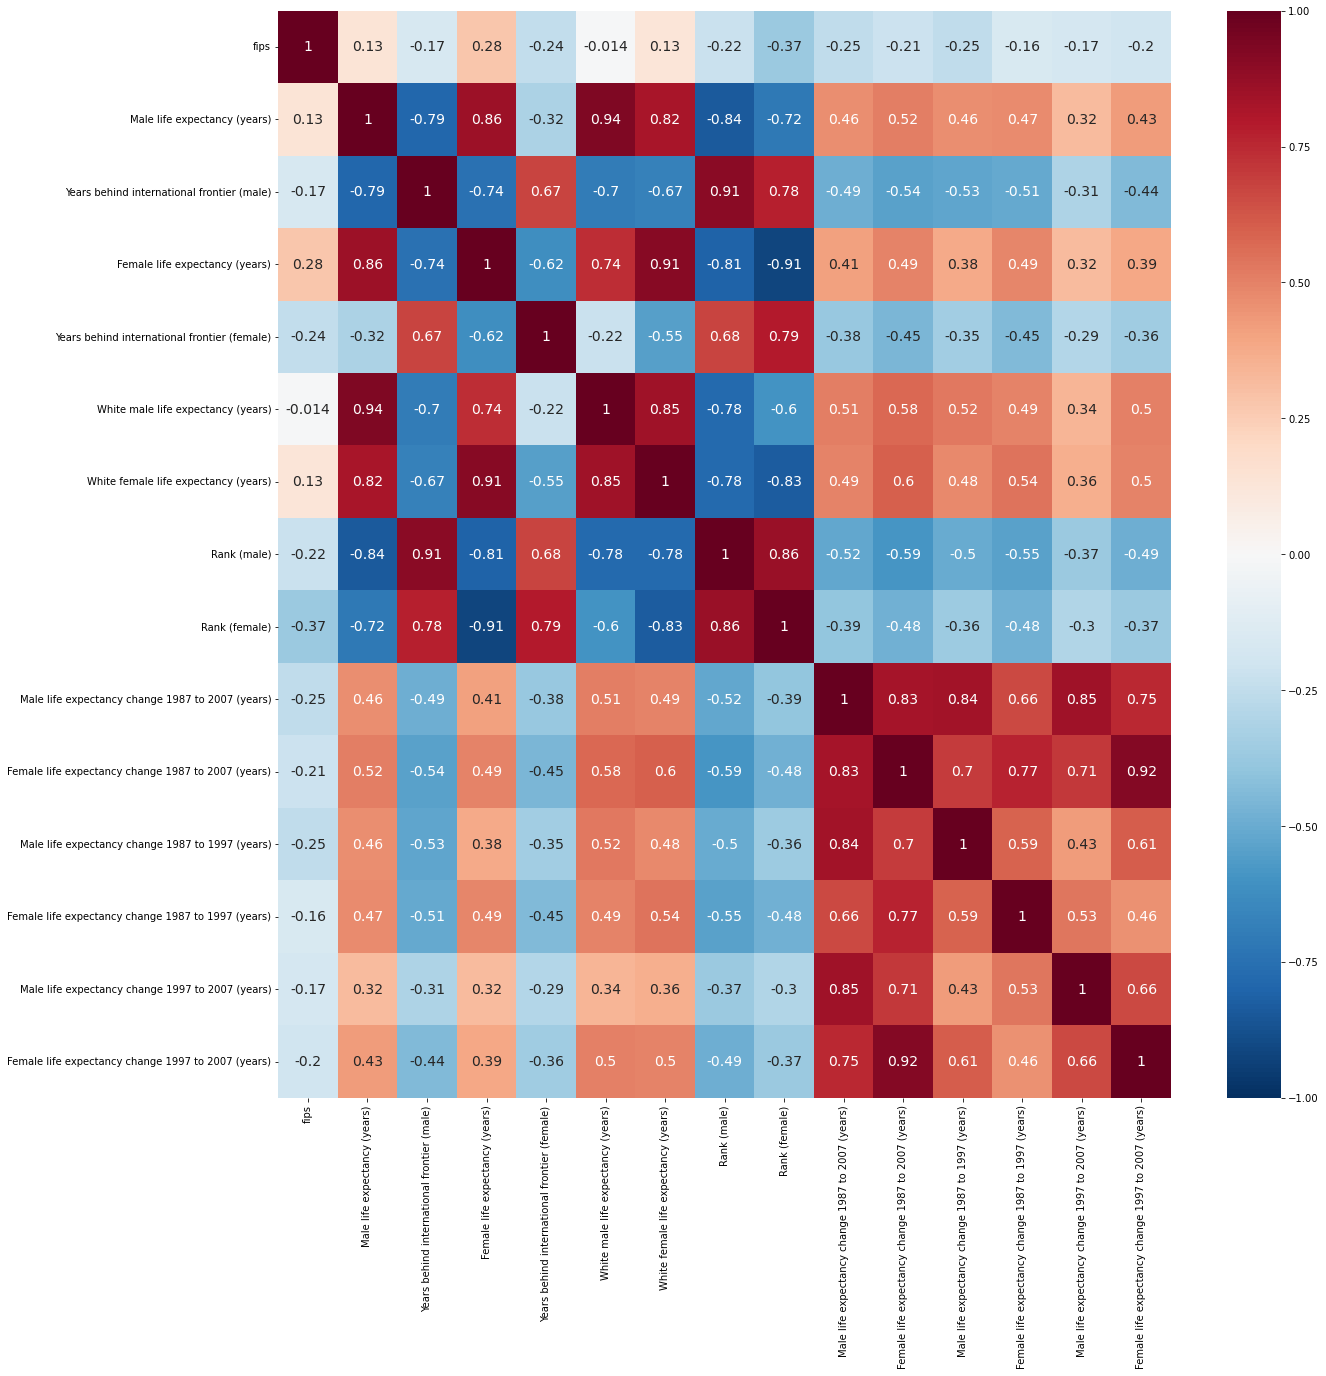

In [7]:
lifeEx_corr=life_ex1.copy()
lifeEx_corr=lifeEx_corr.corr()
plt.figure(figsize = (20,20))
sns.heatmap(data=lifeEx_corr, cmap= 'RdBu_r', vmin=-1, vmax=1, annot=True, annot_kws={"size":14})
plt.show()

we found a strong correlation between the first 8 features aand the last 6 features. so there's no point in keeping all of them. so we picked one of the first 8 features and one of the last 6 features. at the end we chose Male life expectancy change 1997 to 2007 (years) because it performed better than the other feature.

keeping only relevant features: - note: we tried a lot of combination of features that we did not include in the homework, and in the end we chose the one combination that out-performed the others.

In [8]:
life_ex_fin=life_ex1.iloc[:,[0,14]]
cc=country_complete[["fips","white_2010","black_2010","unemployment_rate_2010","pop2010","veterans_2010","white_not_hispanic_2010"]]

more pre-processing: we merged both of the tables together and did more pre-processing with missing values (we filled the missing values by taking the average percentage of black people in every state and then we replaced the missing values with it.)

creating our dataframe that will serve to solve the question.

In [9]:
new_df = pd.merge(life_ex_fin, landarea,  how='inner', left_on='fips',right_on="FIPS")
new_df = pd.merge(new_df, cc,  how='inner', left_on='fips',right_on="fips")
import math
States = ['California', 'Florida', 'South Dakota','Wyoming']
means={}
for state in States:
    means[state]=country_complete.loc[country_complete.state==state]["black_2010"].mean()
def tomean(num,state):
    if(math.isnan(num)):
        return means[state]
    else: return num
new_df["black_2010"]=new_df.apply(lambda x: tomean(x["black_2010"],x["State"]), axis=1)
new_df
X=new_df.iloc[:,[0,1,3,5,6,7,8,9,10,11]]
X = X.groupby(["fips","State"]).mean().reset_index()


In [10]:
X

,fips,State,Male life expectancy change 1997 to 2007 (years),Land Area,white_2010,black_2010,unemployment_rate_2010,pop2010,veterans_2010,white_not_hispanic_2010
0,6001,California,3.5,1910.1,43.0,12.6,10.91,1510271.0,70376.0,34.1
1,6003,California,1.8,1913.1,75.0,0.0,12.92,1175.0,71.0,72.5
2,6005,California,1.3,1534.7,87.0,2.5,14.06,38091.0,5453.0,79.6
3,6007,California,0.7,4246.6,81.9,1.6,13.89,220000.0,21099.0,75.2
4,6009,California,2.7,2642.3,88.9,0.8,14.44,45578.0,5691.0,83.5
...,...,...,...,...,...,...,...,...,...,...
207,56037,Wyoming,1.0,27003.0,88.5,1.0,6.60,43806.0,3888.0,80.9
208,56039,Wyoming,3.2,10380.6,88.4,0.2,7.66,21294.0,1343.0,82.2
209,56041,Wyoming,1.8,5391.7,92.4,0.3,7.03,21118.0,1595.0,88.5
210,56043,Wyoming,1.3,5802.0,91.4,0.3,5.91,8533.0,819.0,83.9


implementing PCA algorithm:

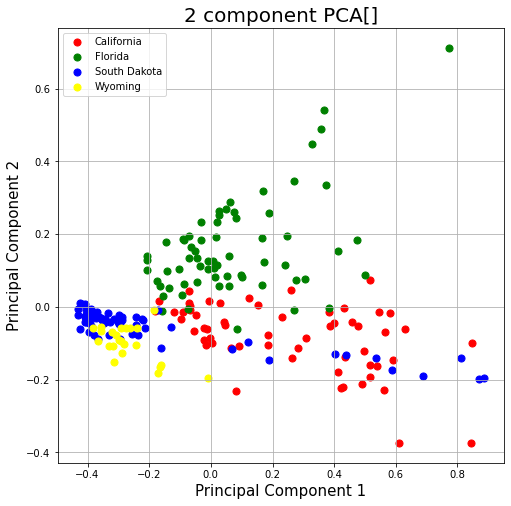

In [11]:
import itertools
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
def pca_function(X_pca,subset=[]):
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(X_pca)
    principalDf = pd.DataFrame(data = principalComponents
                 , columns = ['principal component 1', 'principal component 2'])
    finalDf = pd.concat([principalDf, X[['State']]], axis = 1)
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title('2 component PCA'+str(subset), fontsize = 20)
    States = ['California', 'Florida', 'South Dakota','Wyoming']
    colors = ['r', 'g', 'b',"yellow"]
    for state, color in zip(States,colors):
        indicesToKeep = finalDf['State'] == state
        ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
                   , finalDf.loc[indicesToKeep, 'principal component 2']
                   , c = color
                   , s = 50)
    ax.legend(States)
    ax.grid()
stuff = [2,3,4,5,6,7,8,9]
scaler = MinMaxScaler()
scaler.fit(X.iloc[:,stuff])
X_pca=scaler.transform(X.iloc[:,stuff])
pca_function(X_pca)


after the dimensionality reduction we can see from the graph above that we did get of a clusters with the 8 features we picked. we also observed a correlation between Wyoming and South Dakota and a correlation between Florida and California. now we need to check which features are the most and least effective.

we started by removing one feature at a time and looking at the graph in order to find the <b>most</b> effective feature in separating the four states. (the combination we used is in the graphs' titles).

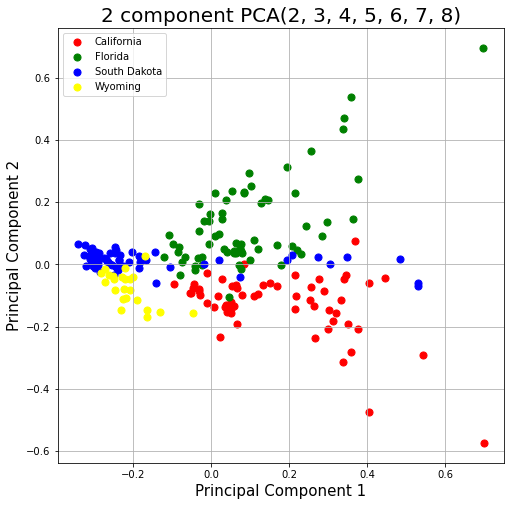

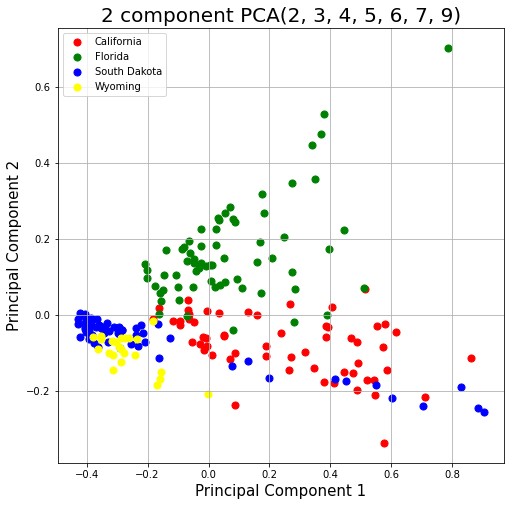

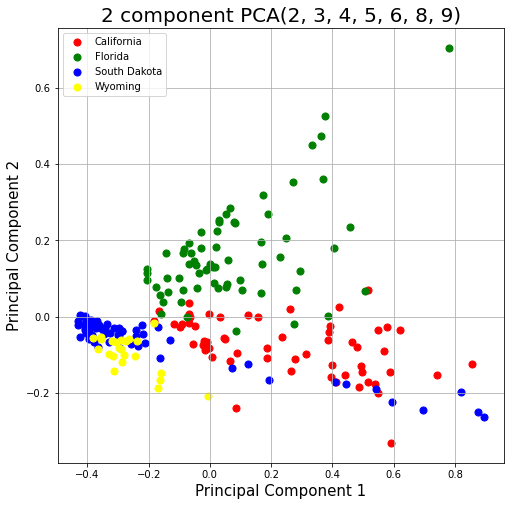

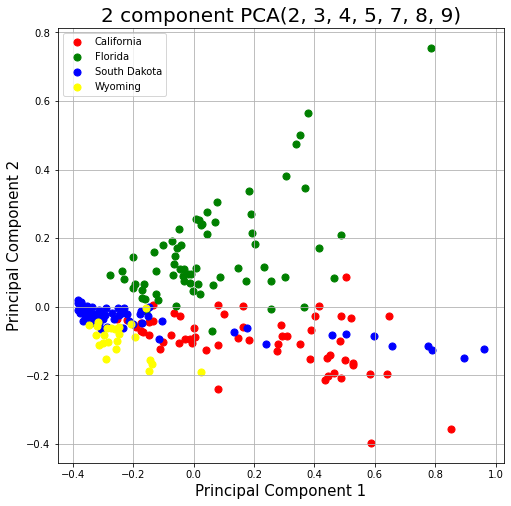

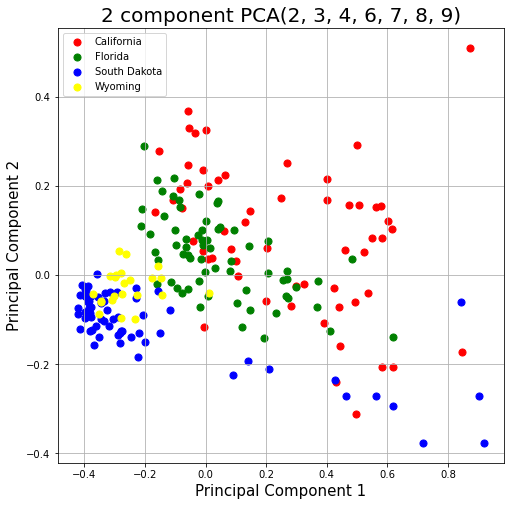

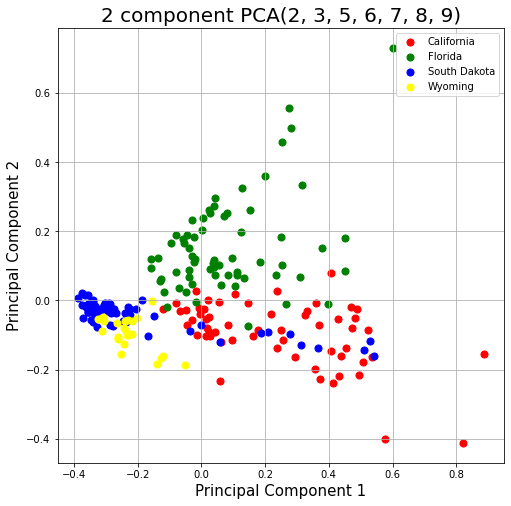

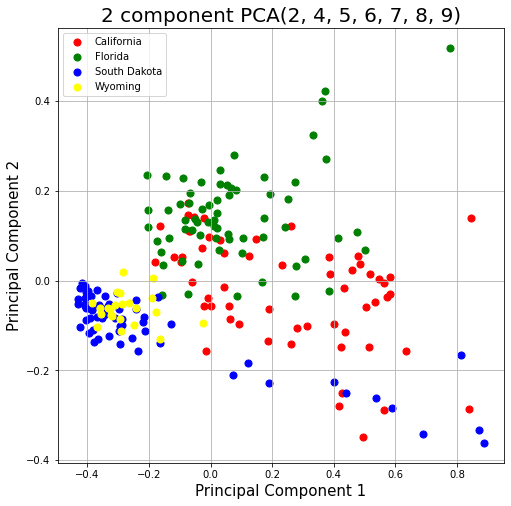

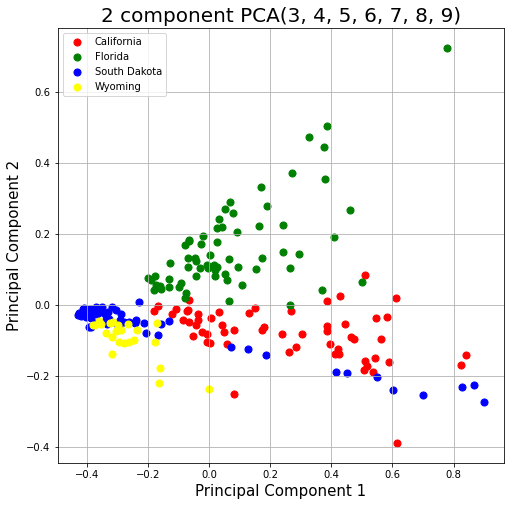

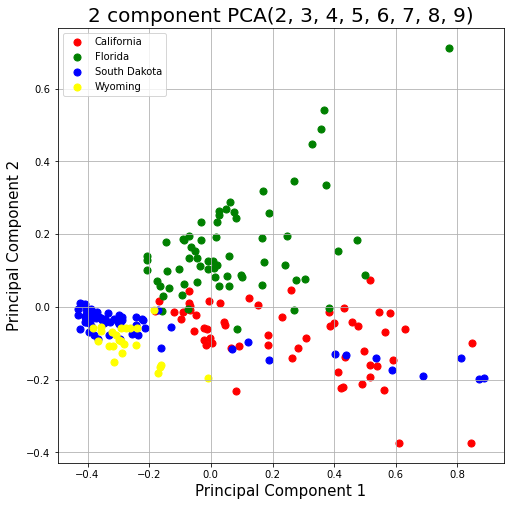

In [12]:
stuff = [2,3,4,5,6,7,8,9]
for L in range(7, len(stuff)+1):
    for subset in itertools.combinations(stuff, L):
        scaler = MinMaxScaler()
        scaler.fit(X.iloc[:,list(subset)])
        X_pca=scaler.transform(X.iloc[:,list(subset)])
        pca_function(X_pca,subset)

from the former graphs, we can see that removing feature 5 (Black 2010) and 3 (LandArea) effects the clustering the most - we can concur from that that the features black 2010 and LandArea are the most effective in helping separate the 4 states. it makes sense, since for example - California is about 1.6 times bigger than Wyoming, so it will make sense to classify the Land with the larger area as "California" rather than "Wyoming". also the percentage of black people in California is 5.7% in relation to Wyoming that is only 0.9%, so it will make sense to classify the state with the higher percentage of black people as "California" rather than "Wyoming".

overall feature 3 -LandArea was the most effective in helping separate the states.

now we removed all of the features except for 3 which is our strongest separator, and we paired it with each one of the other features in order to find the <b>least</b> effective feature in separating the four states. (the combination we used is in the graphs' titles).

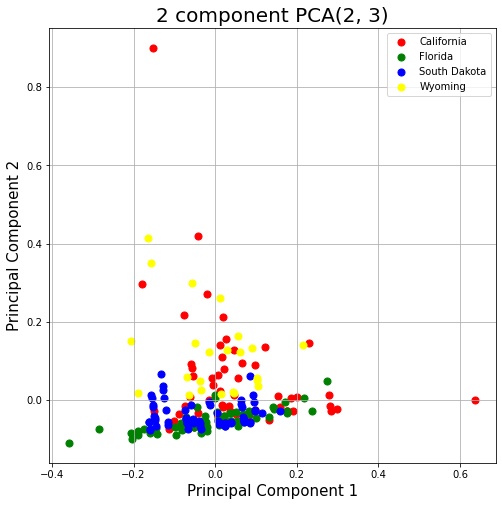

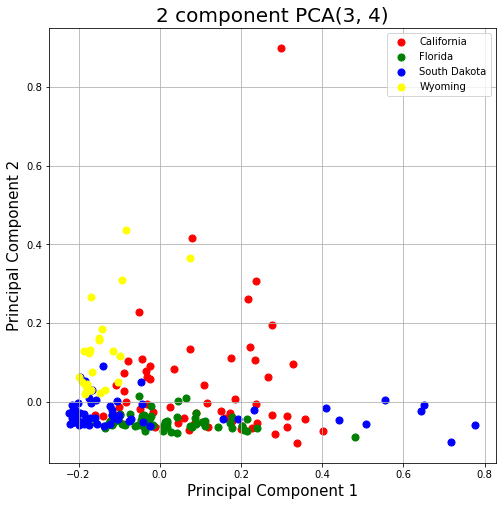

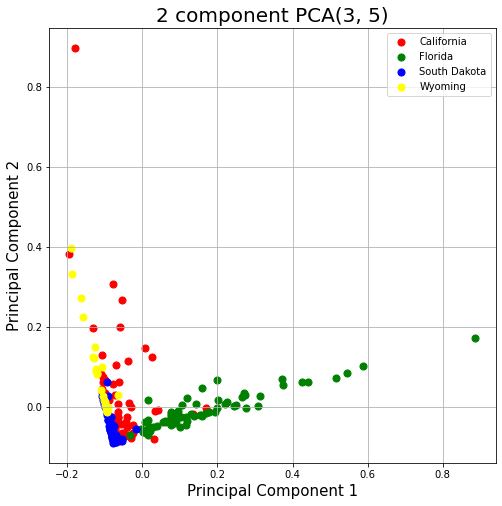

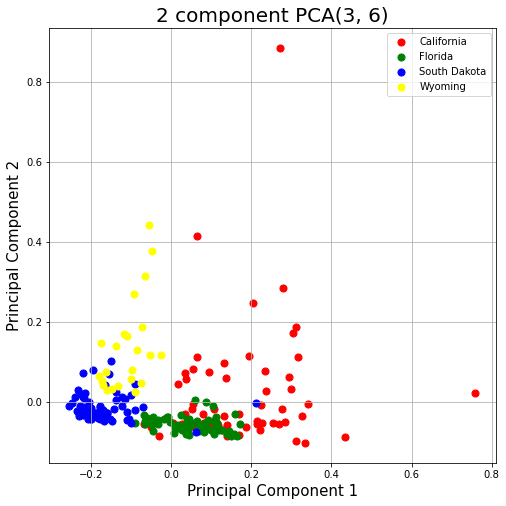

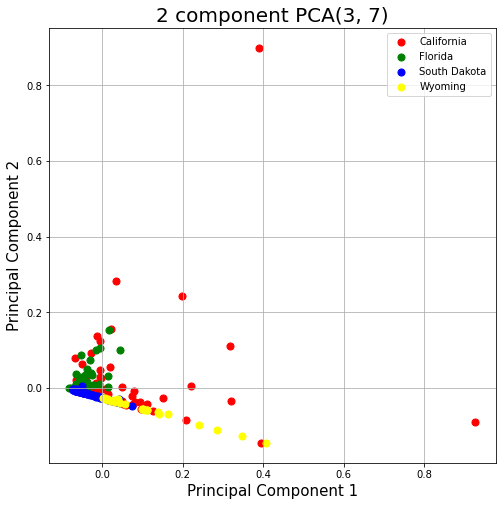

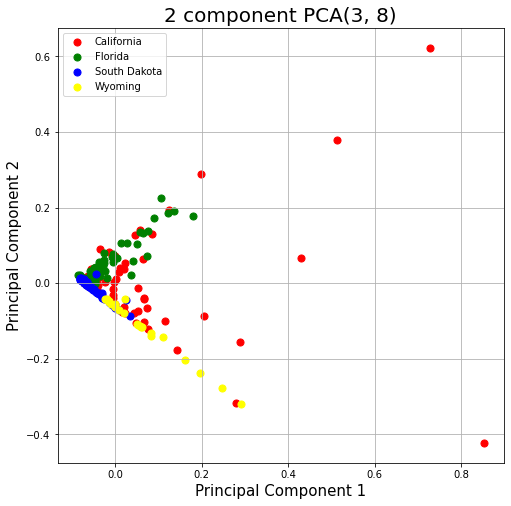

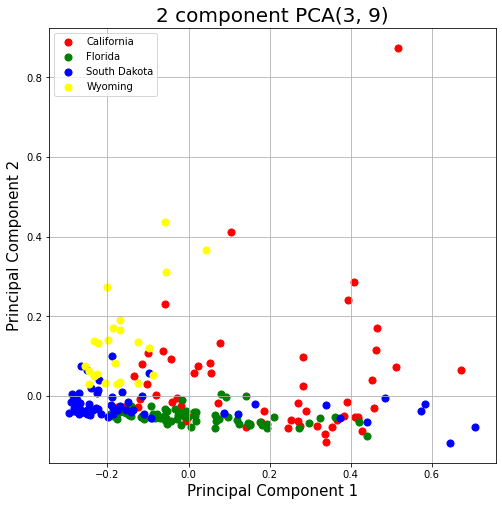

In [13]:
stuff = [2,3,4,5,6,7,8,9]
for subset in itertools.combinations(stuff, 2):
    if 3 in subset:
        scaler = MinMaxScaler()
        scaler.fit(X.iloc[:,list(subset)])
        X_pca=scaler.transform(X.iloc[:,list(subset)])
        pca_function(X_pca,subset)

from the former graphs we can see that our weakest feature would be feature number 9, which is "White and not Hispanic", aside from that we can see that feature 2 (Male life expectancy change 1997 to 2007) was also weak in helping separate the states.

now we're implementing T-SNE algorithm:

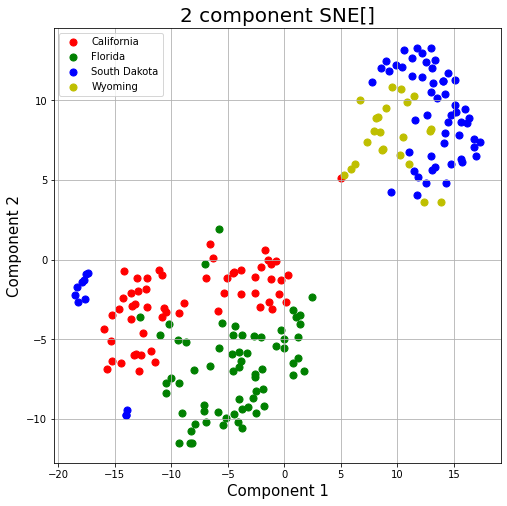

In [14]:
from sklearn.manifold import TSNE
def sne_function(X_sne,subset=[]):
    tsne = TSNE(n_components=2, random_state=0)
    Components = tsne.fit_transform(X_sne)
    tsneDf = pd.DataFrame(data = Components
             , columns = ['component 1', 'component 2'])
    finalDf = pd.concat([tsneDf, X[['State']]], axis = 1)
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Component 1', fontsize = 15)
    ax.set_ylabel('Component 2', fontsize = 15)
    ax.set_title('2 component SNE'+str(subset), fontsize = 20)
    States = ['California', 'Florida', 'South Dakota','Wyoming']
    colors = ['r', 'g', 'b',"y"]
    for state, color in zip(States,colors):
        indicesToKeep = finalDf['State'] == state
        ax.scatter(finalDf.loc[indicesToKeep, 'component 1']
                   , finalDf.loc[indicesToKeep, 'component 2']
                   , c = color
                   , s = 50)
    ax.legend(States)
    ax.grid()
stuff = [2,3,4,5,6,7,8,9]
scaler = MinMaxScaler()
scaler.fit(X.iloc[:,stuff])
X_sne=scaler.transform(X.iloc[:,stuff])
sne_function(X_sne)

we can see from the graph above that from the T-SNE we got a better clustering. this is to be expected since T-SNE is one of the best dimensionality reduction techniques. It involves Hyperparameters such as perplexity, learning rate and number of steps, as opposed to PCA that doesn't have Hyperparameters. plus, TSNE knows how to handle outliers which we can clearly see in the South Dakota cluster.

now once again we're trying all feature combinations in order to find which was the most and least affective features in the same way we used earlier:

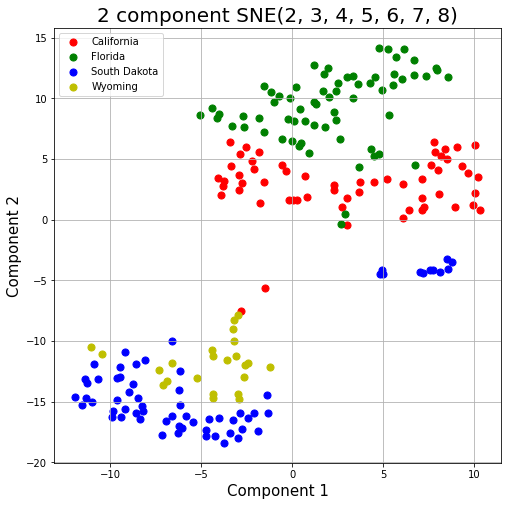

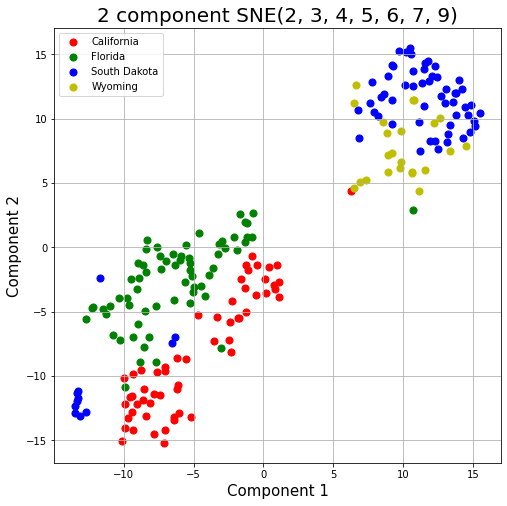

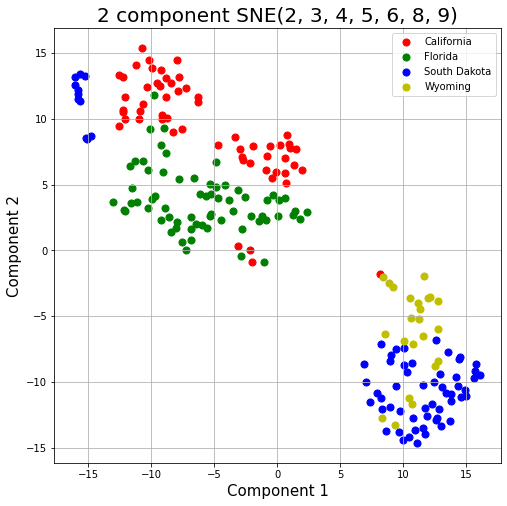

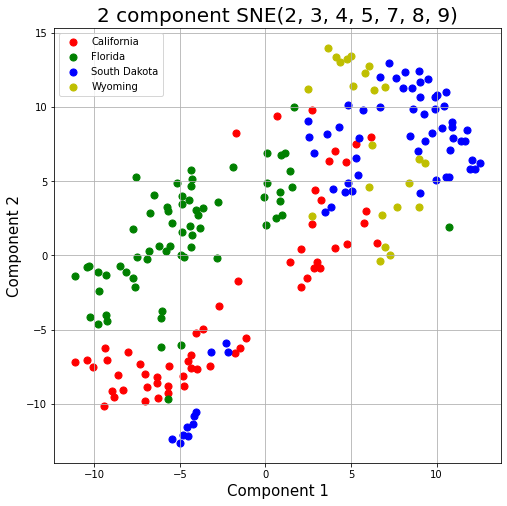

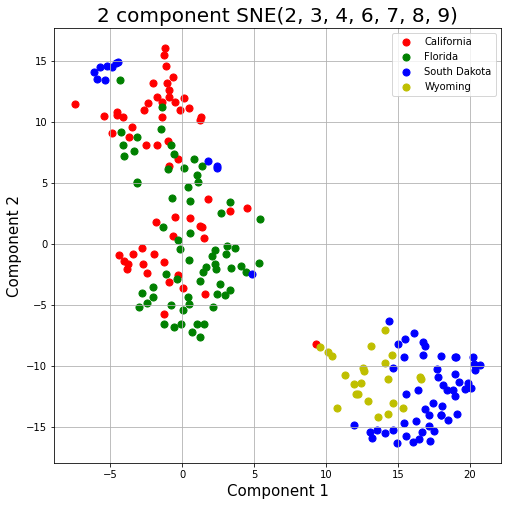

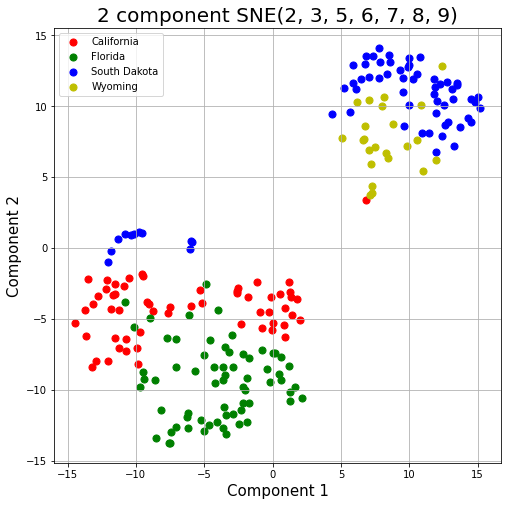

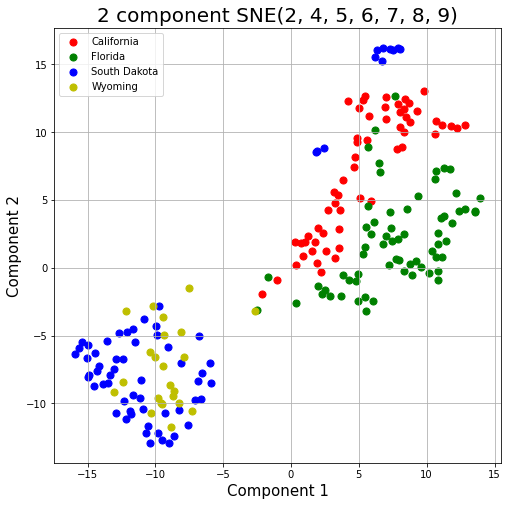

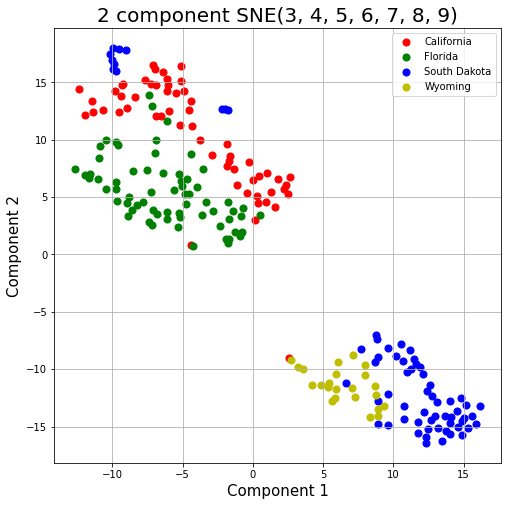

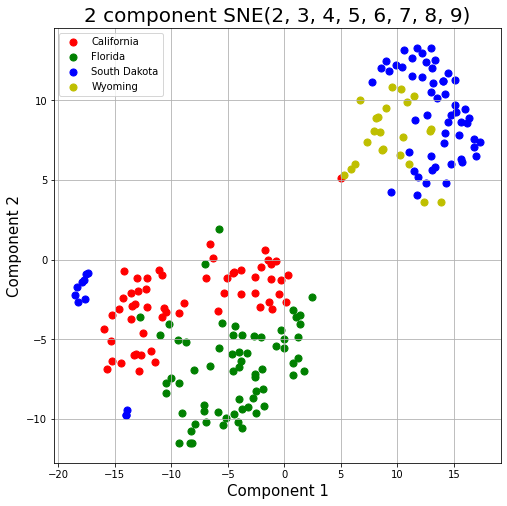

In [15]:
from sklearn.manifold import TSNE
for L in range(7, len(stuff)+1):
    for subset in itertools.combinations(stuff, L):
        scaler = MinMaxScaler()
        scaler.fit(X.iloc[:,list(subset)])
        X_sne=scaler.transform(X.iloc[:,list(subset)])
        sne_function(X_sne,subset)

here we can see that the feature that was the most effective in determining the cluster was feature 6 (unemployment rate 2010) and feature 3 (LandArea) - which when we removed it we didn't get any cluster at all. this confirms our findings in the last section in the PCA implementation. LandArea is most definately our strongest separator.

using the same technique as before:

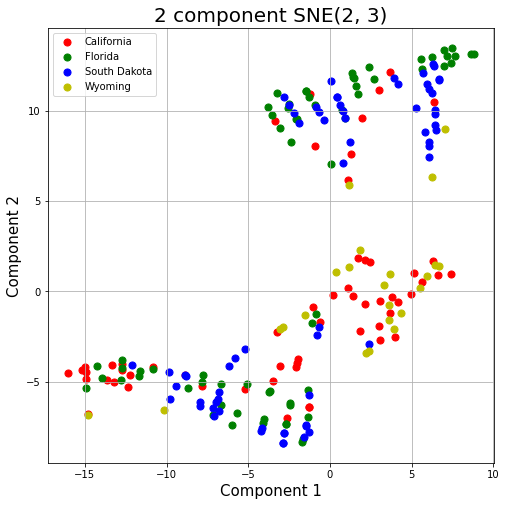

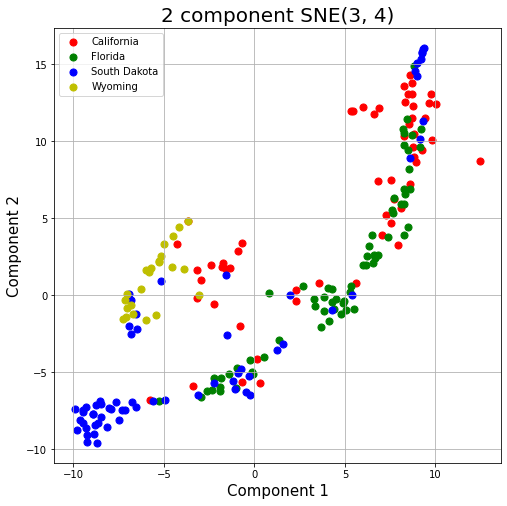

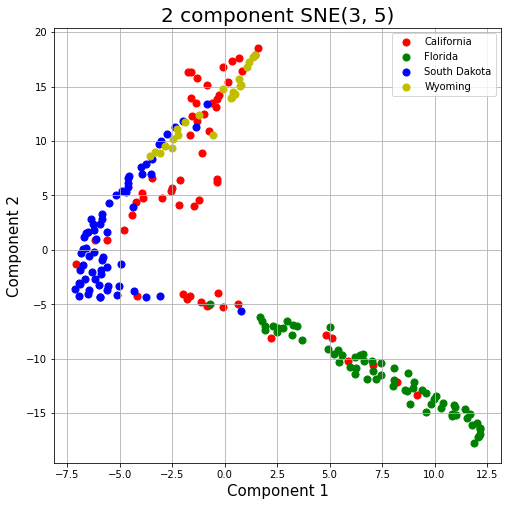

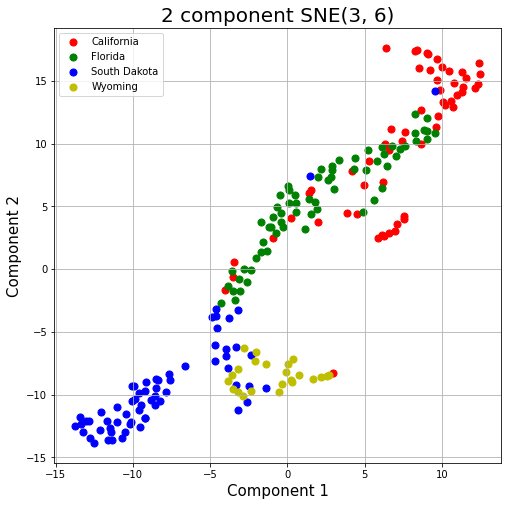

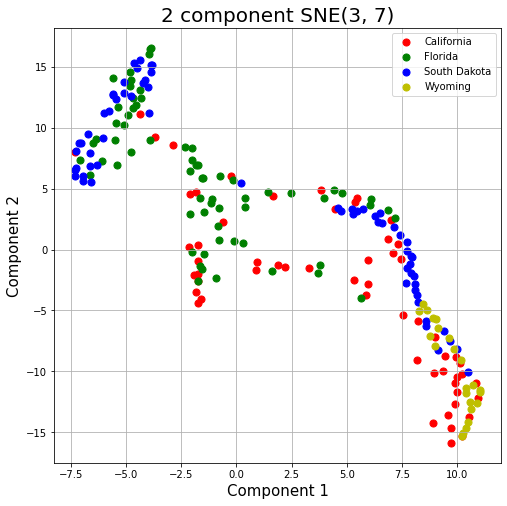

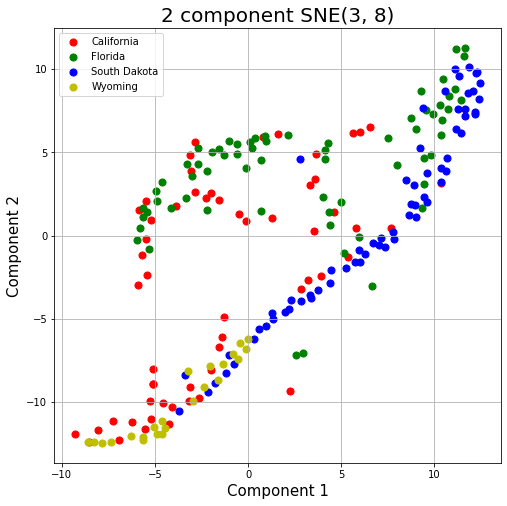

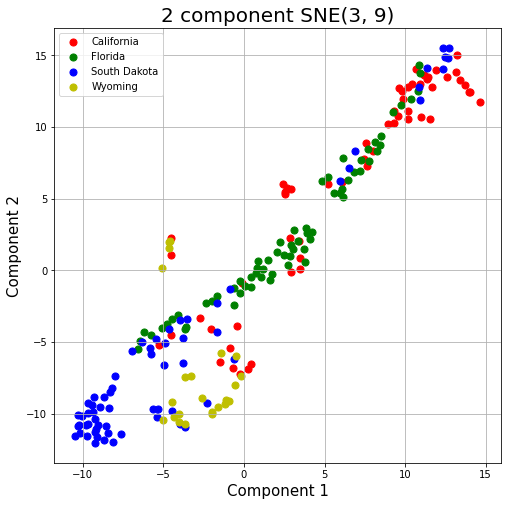

In [16]:
stuff=[2,3,4,5,6,7,8,9]
for subset in itertools.combinations(stuff, 2):
    if 3 in subset:
        scaler = MinMaxScaler()
        scaler.fit(X.iloc[:,list(subset)])
        X_sne=scaler.transform(X.iloc[:,list(subset)])
        sne_function(X_sne,subset)

and once again - we can see that feature 9 and 2 are weakest features since they give us no cluster what so ever.
and this also confirms our finding since 9 is visibly our weakest separator.

<b>Question C:</b>

we started by calcualting the total votes for each state.

In [17]:
house_elec=pd.read_csv("1976-2020-house.csv")
house_elec=house_elec.loc[(house_elec.year<=2012) &(house_elec.year>=2002)]
house_elec=house_elec[["state_fips","year","state","district","totalvotes"]]
house_elec=house_elec.groupby(["state_fips","state","district","year"]).mean().reset_index()
house_elec=house_elec.drop("district",axis=1)
house_elec=house_elec.groupby(["state_fips","state","year"]).sum().reset_index()
house_elec

,state_fips,state,year,totalvotes
0,1,ALABAMA,2002,1268802.0
1,1,ALABAMA,2004,1792759.0
2,1,ALABAMA,2006,1140152.0
3,1,ALABAMA,2008,1855268.0
4,1,ALABAMA,2010,1367747.0
...,...,...,...,...
295,56,WYOMING,2004,239163.0
296,56,WYOMING,2006,196215.0
297,56,WYOMING,2008,249575.0
298,56,WYOMING,2010,190822.0


now we started to calculate the population and age under 18 - we faced a problem that we have a lack of data, so we used a technique which calculates the increased percentage by year and applies that calculation for each year.

another problem was that we had only one feature "age under 18 2010" so we decided to calculate the percentage by "age under 5" because we had more than 2 features which was more than enough to calculate the percentage. and then we used the percentage to calculate the age under 18 for all years.

In [18]:
population=country_complete[["state", "pop2000","pop2010","pop2012"]]
population=population.groupby(["state"]).sum().reset_index()
population["state"]=population.apply(lambda x:x["state"].upper(),axis=1)
population=population.set_index("state")
population["growth_per_year"]=population.apply(lambda x:(x["pop2012"]/x["pop2000"])**(1/12),axis=1)


In [19]:
precentages=country_complete[["state","age_under_5_2010","age_under_5_2019","age_under_18_2010"]]
precentages=precentages.groupby(["state"]).mean().reset_index()
precentages["state"]=precentages.apply(lambda x:x["state"].upper(),axis=1)
precentages=precentages.set_index("state")
precentages["child_increase_per_year_back"]=precentages.apply(lambda x:(x["age_under_5_2010"]/x["age_under_5_2019"])**(1/9),axis=1)


In [20]:
house_elec["age_under_18"]=house_elec.apply(lambda x:precentages["age_under_18_2010"][x["state"]]*precentages["child_increase_per_year_back"][x["state"]]**(2010-x["year"]),axis=1)
house_elec["population"]=house_elec.apply(lambda x:population["pop2000"][x["state"]]*population["growth_per_year"][x["state"]]**(x["year"]-2000) if(x["year"]!=2010) else population["pop2010"][x["state"]],axis=1)
house_elec["registered_voters"]=house_elec.apply(lambda x:x["population"]-x["population"]*(x["age_under_18"]/100),axis=1)
house_elec["voter_turnout"]=house_elec.apply(lambda x:(x["totalvotes"]/x["registered_voters"]),axis=1)
processing=house_elec[["state_fips","state","year","population","voter_turnout"]]
processing

,state_fips,state,year,population,voter_turnout
0,1,ALABAMA,2002,4.506240e+06,0.375605
1,1,ALABAMA,2004,4.566166e+06,0.520976
2,1,ALABAMA,2006,4.626889e+06,0.325286
3,1,ALABAMA,2008,4.688419e+06,0.519712
4,1,ALABAMA,2010,4.779736e+06,0.373957
...,...,...,...,...,...
295,56,WYOMING,2004,5.199765e+05,0.613637
296,56,WYOMING,2006,5.335903e+05,0.486915
297,56,WYOMING,2008,5.475606e+05,0.599132
298,56,WYOMING,2010,5.636260e+05,0.441886


now we have a voter turnout including population number (Which we used as a feature) for each year from 2002 until 2012.

In [21]:
ecnomic=pd.read_csv("BCB-UDJIAD1.csv")
ecnomic.rename(columns={'Value': 'UDJIAD1'},
          inplace=True, errors='raise')
ecnomic["Date"]=ecnomic.apply(lambda x : int(str(x["Date"])[:4]),axis=1)
ecnomic=ecnomic.groupby(["Date"]).mean().reset_index()
processing = pd.merge(processing, ecnomic,  how='inner', left_on='year',right_on="Date")
processing=processing.drop("Date",axis=1)

we calculated the economic values for each state, which was useless later on.

now we used the same technique we used to calculate percentages and applied it to different features, then we tried a lot of combinations until we found the best ones

In [22]:
more_features=country_complete[["state","black_2010", "black_2019","white_2010","white_2019"
                                ,"age_over_65_2010","age_over_65_2019","poverty_2010","poverty_2019"
                                ,"two_plus_races_2010","two_plus_races_2017","white_not_hispanic_2010"
                               ,"white_not_hispanic_2017","hispanic_2010","hispanic_2017","median_age_2017"]]
more_features["state"]=more_features.apply(lambda x:x["state"].upper(),axis=1)
more_features=more_features.groupby(["state"]).mean()
def calc_growth_and_add_to_X(feature_from,feature_to,year_from,year_to):
    more_features["growth_per_year"]=more_features.apply(lambda x:(x[feature_from]/x[feature_to])**(1/(year_to-year_from)),axis=1)
    processing[feature_from[:feature_from.find("2")-1]]=processing.apply(lambda x: more_features[feature_from][x["state"]] * more_features["growth_per_year"][x["state"]] ** (year_from-x["year"]),axis=1)
    
calc_growth_and_add_to_X("black_2010","black_2019",2010,2019)
calc_growth_and_add_to_X("white_2010","white_2019",2010,2019)
calc_growth_and_add_to_X("age_over_65_2010","age_over_65_2019",2010,2019)
calc_growth_and_add_to_X("poverty_2010","poverty_2019",2010,2019)
calc_growth_and_add_to_X("hispanic_2010","hispanic_2017",2010,2017)
# calc_growth_and_add_to_X("white_not_hispanic_2010","white_not_hispanic_2017",2010,2017)
# calc_growth_and_add_to_X("unemployment_rate_2007","unemployment_rate_2012",2007,2012)

processing

                        
                        



,state_fips,state,year,population,voter_turnout,UDJIAD1,black,white,age_over_65,poverty,hispanic
0,1,ALABAMA,2002,4.506240e+06,0.375605,9214.852659,27.956645,67.532954,12.828270,22.068483,3.085586
1,2,ALASKA,2002,6.423408e+05,0.484666,9214.852659,0.991703,53.944140,6.169867,14.969081,2.522289
2,4,ARIZONA,2002,5.343001e+06,0.312799,9214.852659,1.646280,65.830229,13.583439,18.357792,28.439126
3,5,ARKANSAS,2002,2.717508e+06,0.337761,9214.852659,15.619965,79.432311,14.609402,21.557517,4.024039
4,6,CALIFORNIA,2002,3.453004e+07,0.282368,9214.852659,3.361939,67.306383,11.003635,14.102755,26.742415
...,...,...,...,...,...,...,...,...,...,...,...
295,51,VIRGINIA,2012,8.188656e+06,0.578686,12965.287440,18.784872,74.976562,16.318542,13.626371,4.659780
296,53,WASHINGTON,2012,6.890899e+06,0.562063,12965.287440,1.280313,83.588904,17.010933,14.729076,13.083682
297,54,WEST VIRGINIA,2012,1.855360e+06,0.434798,12965.287440,2.263051,95.617154,17.604880,18.630845,1.074812
298,55,WISCONSIN,2012,5.721075e+06,0.643295,12965.287440,1.541200,91.817509,17.059945,11.460236,3.252249


and above is the data we'll be working on in the question. 

before we decided which feature to drop we tried all combination of features and checked which combination gave us the best MSE.

In [23]:
states=processing["state"]
X=processing.drop("state",axis=1).drop("UDJIAD1",axis=1)
y=X["voter_turnout"]
X=X.drop("voter_turnout",axis=1)
# X["voter_turnout"]=y
# X=pd.get_dummies(X)

now we did the train - test split, and we chose 3 models: random forest, gradient boost and Decision tree.

In [24]:
X_training=X.loc[X.year<2010]
X_testing=X.loc[X.year>=2010]
y_training=y[:len(X_training)]
y_testing=y[len(X_training):]
X_training=X_training.drop("year",axis=1)
X_testing=X_testing.drop("year",axis=1)

In [25]:
# decision tree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

# random forest
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

# model building
from sklearn.model_selection import train_test_split, GridSearchCV

# model evaluation
from sklearn.metrics import accuracy_score, mean_squared_error

# set seed for reproducible results
RSEED = 10

In [26]:
gb = GradientBoostingRegressor(random_state=RSEED)
parameters_grid = {
    'learning_rate': [0.1, 0.2],#we made small range to make the code run faster
    'n_estimators': [90, 100]
    
}


# define grid search
grid_search = GridSearchCV(estimator=gb, param_grid=parameters_grid, cv=10)
# fit estimator
grid_search.fit(X_training, y_training)

# get best estimator
best = grid_search.best_estimator_
# predict
y_pred = best.predict(X_testing)
# calculate MSE
MSE = round(mean_squared_error(y_testing, y_pred), 3)

df = pd.DataFrame([MSE]).T
df = df.rename(index={0: 'Decision Tree Regressor'}, columns={0: 'MSE'})
df

,MSE
Decision Tree Regressor,0.008


we got a pretty good MSE - this states that we picked good features and they are working well together.

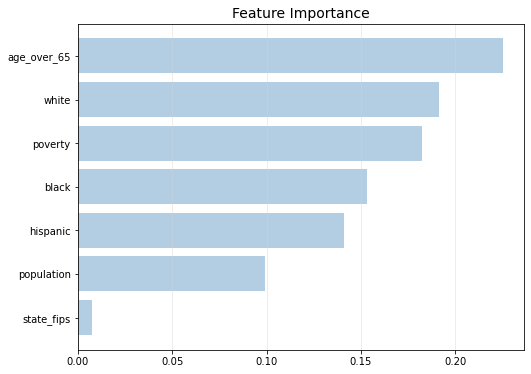

In [27]:
imp = pd.DataFrame(grid_search.best_estimator_.fit(X_training, y_training).feature_importances_, 
                   index=X_training.columns, columns=['Importance']).sort_values('Importance')
# plot feature importance
plt.figure(figsize=(8, 6))
plt.barh(range(0, len(imp)), imp['Importance'], color='#b3cde3')
plt.grid(axis='x', alpha=0.5, color='lightgrey')
plt.yticks(range(0, len(imp)), imp.index)
plt.title('Feature Importance', fontsize=14)
plt.show()

this graph shows us how important each feature to the prediction results - as we can see state_fips is the least important while age over 65 is the most important.

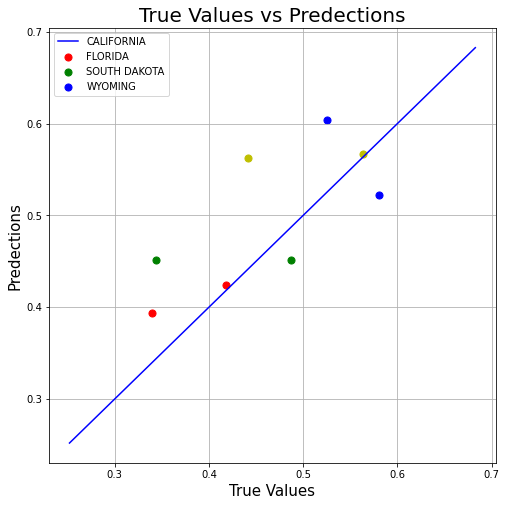

In [28]:
pred,true,chosen_states=[],[],[]
for state,p,t in zip(np.array(states)[len(X_training):],y_pred,y_testing):
#     if(state in ["CALIFORNIA","FLORIDA", "SOUTH DAKOTA", "WYOMING"]):
        pred.append(p)
        true.append(t)
        chosen_states.append(state)
finalDf = pd.DataFrame(
    {'State': chosen_states,
     'pred': pred,
     'true': true
    })
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('True Values', fontsize = 15)
p1 = max(max(y_pred), max(y_testing))
p2 = min(min(y_pred), min(y_testing))
plt.plot([p1, p2], [p1, p2], 'b-')
ax.set_ylabel('Predections', fontsize = 15)
ax.set_title('True Values vs Predections', fontsize = 20)
States = ["CALIFORNIA","FLORIDA", "SOUTH DAKOTA", "WYOMING"]
colors = ['r', 'g', 'b',"y"]
for state, color in zip(States,colors):
    indicesToKeep = finalDf['State'] == state
    ax.scatter(finalDf.loc[indicesToKeep, 'true']
               , finalDf.loc[indicesToKeep, 'pred']
               , c = color
               , s = 50)
ax.legend(States)
ax.grid()


from this graph we can see that our prediction was actually pretty good compared to the true values.

In [29]:
rf = RandomForestRegressor(random_state=RSEED)

parameters_grid = {
    'n_estimators':[50,100],
    'max_depth': [2, 3],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [2, 3]
}

# define grid search
grid_search = GridSearchCV(estimator=rf, param_grid=parameters_grid, cv=10)
# fit estimator
grid_search.fit(X_training, y_training)

# get best estimator
best = grid_search.best_estimator_
# predict
y_pred = best.predict(X_testing)
# calculate MSE
MSE = round(mean_squared_error(y_testing, y_pred), 3)

df = pd.DataFrame([MSE]).T
df = df.rename(index={0: 'Random Forest Regressor'}, columns={0: 'MSE'})
df

,MSE
Random Forest Regressor,0.007


we also got a pretty good MSE when we implemented RFR.

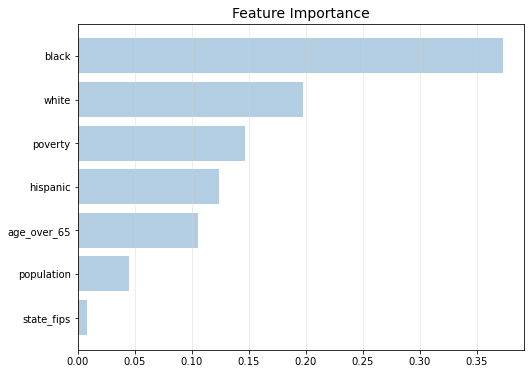

In [30]:
imp = pd.DataFrame(grid_search.best_estimator_.fit(X_training, y_training).feature_importances_, 
                   index=X_training.columns, columns=['Importance']).sort_values('Importance')
# plot feature importance
plt.figure(figsize=(8, 6))
plt.barh(range(0, len(imp)), imp['Importance'], color='#b3cde3')
plt.grid(axis='x', alpha=0.5, color='lightgrey')
plt.yticks(range(0, len(imp)), imp.index)
plt.title('Feature Importance', fontsize=14)
plt.show()

here we can see that once again state_fips is the least important feature when it come to predicting the values. but we can also see that races are always a good predictor since they are always on the top of the list.

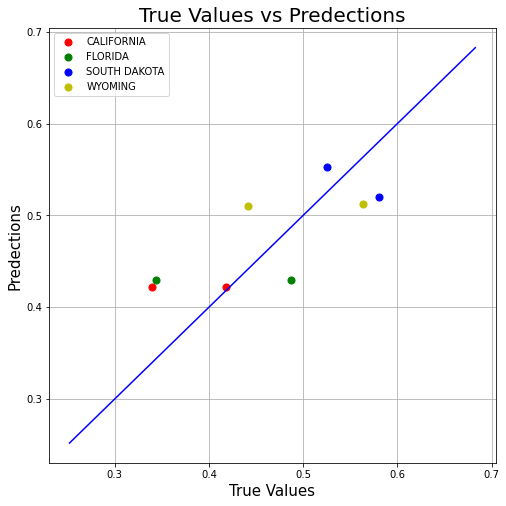

In [31]:
pred,true,chosen_states=[],[],[]
for state,p,t in zip(np.array(states)[len(X_training):],y_pred,y_testing):
    if(state in ["CALIFORNIA","FLORIDA", "SOUTH DAKOTA", "WYOMING"]):
        pred.append(p)
        true.append(t)
        chosen_states.append(state)
finalDf = pd.DataFrame(
    {'State': chosen_states,
     'pred': pred,
     'true': true
    })
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('True Values', fontsize = 15)
ax.set_ylabel('Predections', fontsize = 15)
ax.set_title('True Values vs Predections', fontsize = 20)
States = ["CALIFORNIA","FLORIDA", "SOUTH DAKOTA", "WYOMING"]
colors = ['r', 'g', 'b',"y"]
for state, color in zip(States,colors):
    indicesToKeep = finalDf['State'] == state
    ax.scatter(finalDf.loc[indicesToKeep, 'true']
               , finalDf.loc[indicesToKeep, 'pred']
               , c = color
               , s = 50)
ax.legend(States)
ax.grid()
p1 = max(max(y_pred), max(y_testing))
p2 = min(min(y_pred), min(y_testing))
plt.plot([p1, p2], [p1, p2], 'b-')

once again according to this graph we can see that we did get pretty good results.

In [32]:

dt = DecisionTreeRegressor(random_state=RSEED)

parameters_grid = {
    'max_depth': [2, 3,4,5,6],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [2, 3]
}

# define grid search
grid_search = GridSearchCV(estimator=dt, param_grid=parameters_grid, cv=10)
# fit estimator
grid_search.fit(X_training, y_training)

# get best estimator
best = grid_search.best_estimator_
# predict
y_pred = best.predict(X_testing)
# calculate MSE
MSE = round(mean_squared_error(y_testing, y_pred), 3)

df = pd.DataFrame([MSE]).T
df = df.rename(index={0: 'Decision Tree Regressor'}, columns={0: 'MSE'})
df

,MSE
Decision Tree Regressor,0.007


we got a pretty good MSE here as well. so our features were constantly good.

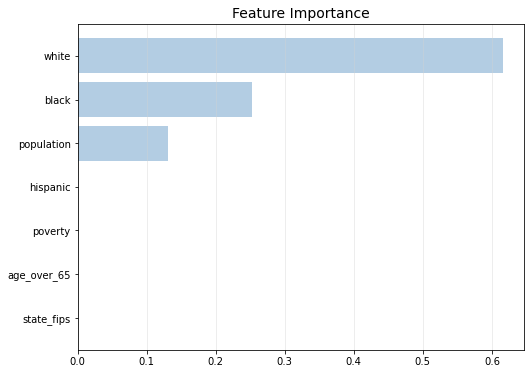

In [33]:
imp = pd.DataFrame(grid_search.best_estimator_.fit(X_training, y_training).feature_importances_, 
                   index=X_training.columns, columns=['Importance']).sort_values('Importance')
# plot feature importance
plt.figure(figsize=(8, 6))
plt.barh(range(0, len(imp)), imp['Importance'], color='#b3cde3')
plt.grid(axis='x', alpha=0.5, color='lightgrey')
plt.yticks(range(0, len(imp)), imp.index)
plt.title('Feature Importance', fontsize=14)
plt.show()

here we got that the only important features for our algorithm were "population" "black" and "white". while the rest were unimportant.

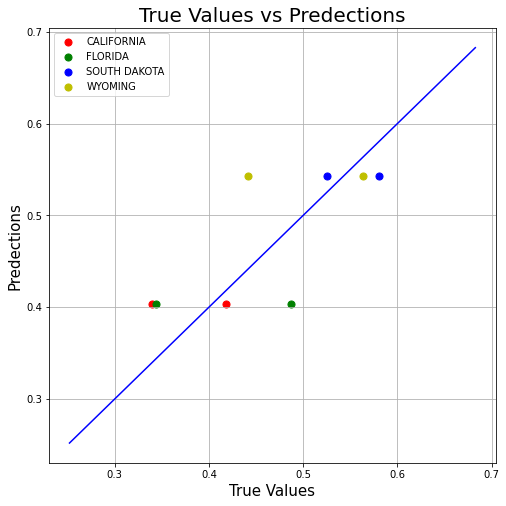

In [34]:
pred,true,chosen_states=[],[],[]
for state,p,t in zip(np.array(states)[len(X_training):],y_pred,y_testing):
    if(state in ["CALIFORNIA","FLORIDA", "SOUTH DAKOTA", "WYOMING"]):
        pred.append(p)
        true.append(t)
        chosen_states.append(state)
finalDf = pd.DataFrame(
    {'State': chosen_states,
     'pred': pred,
     'true': true
    })
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('True Values', fontsize = 15)
ax.set_ylabel('Predections', fontsize = 15)
ax.set_title('True Values vs Predections', fontsize = 20)
States = ["CALIFORNIA","FLORIDA", "SOUTH DAKOTA", "WYOMING"]
colors = ['r', 'g', 'b',"y"]
for state, color in zip(States,colors):
    indicesToKeep = finalDf['State'] == state
    ax.scatter(finalDf.loc[indicesToKeep, 'true']
               , finalDf.loc[indicesToKeep, 'pred']
               , c = color
               , s = 50)
ax.legend(States)
ax.grid()
p1 = max(max(y_pred), max(y_testing))
p2 = min(min(y_pred), min(y_testing))
plt.plot([p1, p2], [p1, p2], 'b-')

and once again we got a pretty good graph - our prediction values are not so far from our linear line.

our final prediction:

we ranked the states from worst to best by the average difference between y_predict and y_true.

In [35]:
pred,true,chosen_states=[],[],[]
for state,p,t in zip(np.array(states)[len(X_training):],y_pred,y_testing):
    pred.append(p)
    true.append(t)
    chosen_states.append(state)
finalDf = pd.DataFrame(
    {'State': chosen_states,
     'pred': pred,
     'true': true
    })
finalDf["avg_diff"]=finalDf.apply(lambda x : abs(x["pred"]-x["true"]),axis=1)
finalDf=finalDf.iloc[:,[0,3]]
finalDf=finalDf.groupby(["State"]).mean()
finalDf=finalDf.sort_values(by='avg_diff', ascending=False)
finalDf["rank"]=range(50,0,-1)
finalDf


,avg_diff,rank
State,,
UTAH,0.125626,50
VIRGINIA,0.115229,49
NEW HAMPSHIRE,0.108154,48
NORTH CAROLINA,0.107348,47
NEBRASKA,0.098270,46
LOUISIANA,0.093153,45
MISSISSIPPI,0.090397,44
OKLAHOMA,0.088787,43
IOWA,0.088172,42


we can see that the worst 5 states are Utah, Virginia, New Hampshire, North Carolina and Nebraska.

now we modified the model and the features by keeping the econimic feature (UDJIAD1) and we made the model more specific by making the max depth high (from 6 - 8).

In [36]:
states=processing["state"]
X=processing.drop("state",axis=1)
y=X["voter_turnout"]
X=X.drop("voter_turnout",axis=1)
X_training=X.loc[X.year<2010]
X_testing=X.loc[X.year>=2010]
y_training=y[:len(X_training)]
y_testing=y[len(X_training):]
X_training=X_training.drop("year",axis=1)
X_testing=X_testing.drop("year",axis=1)


dt = DecisionTreeRegressor(random_state=RSEED)

parameters_grid = {
    'max_depth': [6,7,8],
    'min_samples_split': [2],
    'min_samples_leaf': [2]
}

# define grid search
grid_search = GridSearchCV(estimator=dt, param_grid=parameters_grid, cv=10)
# fit estimator
grid_search.fit(X_training, y_training)

# get best estimator
best = grid_search.best_estimator_
# predict
y_pred = best.predict(X_testing)
# calculate MSE
MSE = round(mean_squared_error(y_testing, y_pred), 3)

df = pd.DataFrame([MSE]).T
df = df.rename(index={0: 'Decision Tree Regressor'}, columns={0: 'MSE'})
df
pred,true,chosen_states=[],[],[]
for state,p,t in zip(np.array(states)[len(X_training):],y_pred,y_testing):
    pred.append(p)
    true.append(t)
    chosen_states.append(state)
finalDf = pd.DataFrame(
    {'State': chosen_states,
     'pred': pred,
     'true': true
    })
finalDf["sum"]=finalDf.apply(lambda x : abs(x["pred"]-x["true"]),axis=1)
finalDf=finalDf.iloc[:,[0,3]]
finalDf=finalDf.groupby(["State"]).mean()
finalDf=finalDf.sort_values(by='sum', ascending=False)
finalDf["rank"]=range(50,0,-1)
finalDf

,sum,rank
State,,
NORTH CAROLINA,0.214227,50
IOWA,0.213242,49
MISSISSIPPI,0.210124,48
MINNESOTA,0.208115,47
WISCONSIN,0.203550,46
FLORIDA,0.196988,45
VIRGINIA,0.194151,44
NEW JERSEY,0.189466,43
IDAHO,0.179253,42


doing that, we got Nebraska to rank 27 and Utah to rank 24. now because we made our model more specific the accuracy got better. and we can conclude that the economic feature highly correlates to these states. 

<b>Question D:</b>

first of all we needed to pre-process the data in the file, in order to be able to categorize each year as a "republican" win or a "democrat" win.

In [37]:
house = pd.read_csv('1976-2020-house.csv')

In [38]:
house1 =house.groupby(["state","year","party"])['candidatevotes'].sum().reset_index()
house1['max'] = house1.groupby(["state","year"])['candidatevotes'].transform(max)
house1

,state,year,party,candidatevotes,max
0,ALABAMA,1976,DEMOCRAT,667052,667052
1,ALABAMA,1976,NATIONAL DEMOCRAT,1021,667052
2,ALABAMA,1976,PROHIBITION,1111,667052
3,ALABAMA,1976,REPUBLICAN,314970,667052
4,ALABAMA,1978,CONSERVATIVE,3285,439564
...,...,...,...,...,...
4730,WYOMING,2018,REPUBLICAN,127963,127963
4731,WYOMING,2020,CONSTITUTION,7905,185732
4732,WYOMING,2020,DEMOCRAT,66576,185732
4733,WYOMING,2020,LIBERTARIAN,10154,185732


we grouped the data by state, year and party. they chose the max value of candidate votes to be our "max" in order to help us with calculations later on.

In [39]:
def fun1(max,votes,party):
    if votes == max:
        return party
    return None
house1["win"]=house1.apply(lambda x: fun1(x["max"],x["candidatevotes"],x["party"]),axis=1)
def fun3(group):
    for party in group["win"]:
        if(party != None):
            return party[0]
house2 = house1[["state","year","win"]].groupby(["state","year"]).apply(fun3).reset_index()
house2=house2.rename({0:"win"},axis=1)
house2=house2.loc[house2.year>2000].reset_index().drop("index",axis=1)
house2

,state,year,win
0,ALABAMA,2002,R
1,ALABAMA,2004,R
2,ALABAMA,2006,R
3,ALABAMA,2008,R
4,ALABAMA,2010,R
...,...,...,...
496,WYOMING,2012,R
497,WYOMING,2014,R
498,WYOMING,2016,R
499,WYOMING,2018,R


In [40]:
sum_features=country_complete[["state","pop2000","pop2017"]]
sum_features["state"]=sum_features.apply(lambda x:x["state"].upper(),axis=1)
sum_features=sum_features.groupby(["state"]).sum()
more_features2 = pd.merge(more_features, sum_features,  how='inner', left_on='state',right_on="state")
def calc_growth_and_add_to_X(feature_from,feature_to,year_from,year_to):
    more_features2["growth_per_year"]=more_features2.apply(lambda x:(x[feature_from]/x[feature_to])**(1/(year_to-year_from)),axis=1)
    house2[feature_from[:feature_from.find("2")-1]]=house2.apply(lambda x: more_features2[feature_from][x["state"]] * more_features2["growth_per_year"][x["state"]] ** (year_from-x["year"]),axis=1)
calc_growth_and_add_to_X("black_2010","black_2019",2010,2019)
calc_growth_and_add_to_X("white_2010","white_2019",2010,2019)
calc_growth_and_add_to_X("age_over_65_2010","age_over_65_2019",2010,2019)
calc_growth_and_add_to_X("poverty_2010","poverty_2019",2010,2019)
calc_growth_and_add_to_X("two_plus_races_2010","two_plus_races_2017",2010,2017)
# calc_growth_and_add_to_X("hispanic_2010","hispanic_2017",2010,2017)
calc_growth_and_add_to_X("hispanic_2010","hispanic_2017",2010,2017)
calc_growth_and_add_to_X("pop2000","pop2017",2000,2017)

house2

,state,year,win,black,white,age_over_65,poverty,two_plus_races,hispanic,po
0,ALABAMA,2002,R,27.956645,67.532954,12.828270,22.068483,2.472583,3.085586,4.495397e+06
1,ALABAMA,2004,R,28.064987,67.461543,13.366255,21.507173,2.125136,3.112710,4.544219e+06
2,ALABAMA,2006,R,28.173748,67.390207,13.926801,20.960141,1.826511,3.140073,4.593572e+06
3,ALABAMA,2008,R,28.282931,67.318946,14.510855,20.427022,1.569849,3.167676,4.643460e+06
4,ALABAMA,2010,R,28.392537,67.247761,15.119403,19.907463,1.349254,3.195522,4.693890e+06
...,...,...,...,...,...,...,...,...,...,...
496,WYOMING,2012,R,0.505977,92.599489,15.131325,10.188522,1.607988,7.760442,5.527249e+05
497,WYOMING,2014,R,0.521088,92.638124,15.885403,11.002478,1.415937,7.924271,5.632113e+05
498,WYOMING,2016,R,0.536650,92.676775,16.677060,11.881459,1.246824,8.091558,5.738966e+05
499,WYOMING,2018,R,0.552677,92.715443,17.508170,12.830663,1.097909,8.262377,5.847846e+05


we added the features we wanted to use from all the other data.

In [41]:
# decision tree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

# random forest
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

# model building
from sklearn.model_selection import train_test_split, GridSearchCV

# model evaluation
from sklearn.metrics import accuracy_score, mean_squared_error

# set seed for reproducible results
RSEED = 10

# model building
from sklearn.model_selection import train_test_split, GridSearchCV

# model evaluation
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix

In [42]:
# define function to calculate metrics
def get_metrics(y_test, y_pred):
    
    actual_pos = y_test == 1
    actual_neg = y_test == 0
    
    # get confusion matrix
    mat = metrics.confusion_matrix(y_test, y_pred)
    true_neg, false_pos, false_neg, true_pos = mat.ravel()
    
    # calculate sensitivity and specificity
    sensitivity = round(true_pos / np.sum(actual_pos), 3)
    specificity = round(true_neg / np.sum(actual_neg), 3)
    
    return sensitivity, specificity

started with the classifications:
we decided to - once again check which features to drop and found out that dropping "year" and "state" yields the best results.

In [43]:
X=house2.drop("win",axis=1).drop("year",axis=1).drop("state",axis=1)
y=house2["win"]
y=y.apply(lambda x : 1 if x=="D" else 0)
X_training, X_testing, y_training, y_testing = train_test_split(X, y, test_size=0.2, random_state=RSEED)
rf = RandomForestClassifier(random_state=RSEED)
parameters_grid = {
    'n_estimators':[50,100],
    'max_depth': [2, 3],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [2, 3]
}

# define grid search
grid_search = GridSearchCV(estimator=rf, param_grid=parameters_grid, cv=10)
# fit estimator
grid_search.fit(X_training, y_training)

# get best estimator
best = grid_search.best_estimator_
# predict
y_pred = best.predict(X_testing)
# calculate metrics
acc = round(accuracy_score(y_testing, y_pred), 3)
sensitivity, specificity = get_metrics(y_testing, y_pred)

# display metrics
rf_df = pd.DataFrame([acc, sensitivity, specificity]).T
rf_df = rf_df.rename(index={0: 'Random Forest Classifier'}, columns={0: 'Accuracy', 1: 'Sensitivity', 2: 'Specificity'})
rf_df

,Accuracy,Sensitivity,Specificity
Random Forest Classifier,0.891,0.833,0.932


we can see that we got pretty good metrics - good accuracy, sensitivity and specificity. which means the features we picked work well with deciding the prediction results.

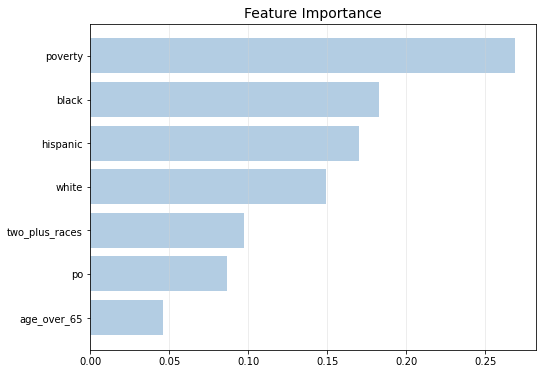

In [44]:
imp = pd.DataFrame(grid_search.best_estimator_.fit(X_training, y_training).feature_importances_, 
                   index=X_training.columns, columns=['Importance']).sort_values('Importance')
# plot feature importance
plt.figure(figsize=(8, 6))
plt.barh(range(0, len(imp)), imp['Importance'], color='#b3cde3')
plt.grid(axis='x', alpha=0.5, color='lightgrey')
plt.yticks(range(0, len(imp)), imp.index)
plt.title('Feature Importance', fontsize=14)
plt.show()

as for feature importance we can see that all features somehow contributed to the prediction result. we can see that the weakest featurue was "age over 65" meanwhile the strongest was "poverty"

In [45]:
X=house2.drop("win",axis=1).drop("year",axis=1).drop("state",axis=1)
y=house2["win"]
y=y.apply(lambda x : 1 if x=="D" else 0)
X_training, X_testing, y_training, y_testing = train_test_split(X, y, test_size=0.2, random_state=RSEED)

# define model
gb = GradientBoostingClassifier(random_state=RSEED)

# define parameter grid
parameters_grid = {
    'learning_rate': [0.5, 1, 1.5],
    'n_estimators': [50, 100]
}

# define grid search
grid_search = GridSearchCV(estimator=gb, param_grid=parameters_grid, cv=10)

# fit estimator
grid_search.fit(X_training, y_training)

# get best estimator
best = grid_search.best_estimator_
# print best parameters
pd.DataFrame.from_dict(grid_search.best_params_, orient='index', columns=['Selected Value']).T

# predict
y_pred = best.predict(X_testing)

# calculate metrics
acc = round(accuracy_score(y_testing, y_pred), 3)
sensitivity, specificity = get_metrics(y_testing, y_pred)

# display metrics
gb_df = pd.DataFrame([acc, sensitivity, specificity]).T
gb_df = gb_df.rename(index={0: 'Gradient Boosting Classifier'}, columns={0: 'Accuracy', 1: 'Sensitivity', 2: 'Specificity'})
gb_df

,Accuracy,Sensitivity,Specificity
Gradient Boosting Classifier,0.851,0.786,0.898


we also got good results in the gradient boost classifier. albiet we got a lower result in sensitivity. that just means that our classifier was not as good in predicting positive instances.

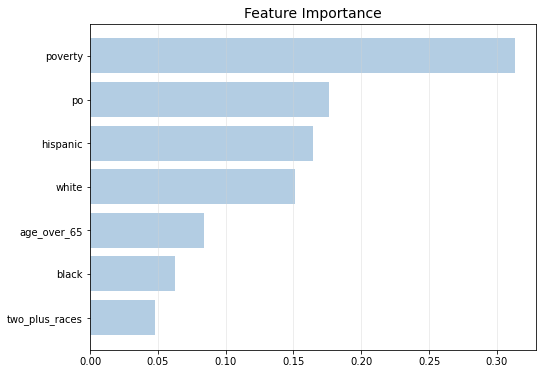

In [46]:
imp = pd.DataFrame(grid_search.best_estimator_.fit(X_training, y_training).feature_importances_, 
                   index=X_training.columns, columns=['Importance']).sort_values('Importance')
# plot feature importance
plt.figure(figsize=(8, 6))
plt.barh(range(0, len(imp)), imp['Importance'], color='#b3cde3')
plt.grid(axis='x', alpha=0.5, color='lightgrey')
plt.yticks(range(0, len(imp)), imp.index)
plt.title('Feature Importance', fontsize=14)
plt.show()

once again - for feature importance we can see that all features somehow contributed to the prediction result. we can see that the weakest featurue was "two plus races" meanwhile the strongest was once again "poverty"

In [47]:
from sklearn import svm
from sklearn import preprocessing
X=house2.drop("win",axis=1).drop("year",axis=1).drop("state",axis=1)
y=house2["win"]
y=y.apply(lambda x : 1 if x=="D" else 0)
X = preprocessing.scale(X)
X_training, X_testing, y_training, y_testing = train_test_split(X, y, test_size=0.2, random_state=RSEED)

sv = svm.SVC()
tuned_parameters = [
    {"kernel": ["rbf"], "gamma": [1e-3, 1e-4], "C": [1, 10, 100, 1000]},
    {"kernel": ["linear"], "C": [1, 10, 100, 1000]},
]

# define grid search
grid_search = GridSearchCV(estimator=sv, param_grid=tuned_parameters, cv=10)
# fit estimator
grid_search.fit(X_training, y_training)

# get best estimator
best = grid_search.best_estimator_
# predict
y_pred = best.predict(X_testing)
# calculate Metrics
acc = round(accuracy_score(y_testing, y_pred), 3)

sensitivity, specificity = get_metrics(y_testing, y_pred)

df = pd.DataFrame([acc, sensitivity, specificity]).T
df = df.rename(index={0: 'SVM Classifier'}, columns={0: 'Accuracy', 1: 'Sensitivity', 2: 'Specificity'})
df

,Accuracy,Sensitivity,Specificity
SVM Classifier,0.703,0.5,0.847


as for the SVM we got pretty good metrics. the sensitivity is low which means that the model wasn't as good in determining positive instances correctly. but the specifity is pretty high so the model was pretty accurate with predecting negatives. which means the model wasn't as accurate when predicting when democrates won, but it was accurate when predicting if republicans won.

Question E:

we started by pre-processing the data: we only took the states we needed (the ones that had a senate election this year).

In [48]:
senate = pd.read_csv('1976-2020-senate.csv')

In [49]:
senate
senate['party_detailed'] = senate['party_detailed'].replace(['INDEPENDENT'],'DEMOCRAT')
values  = ['DEMOCRAT','REPUBLICAN']
senate = senate[senate.party_detailed.isin(values) == True]

In [50]:
senate1 =senate.groupby(["state","year","party_detailed"])['candidatevotes'].sum().reset_index()
senate1['max'] = senate1.groupby(["state","year"])['candidatevotes'].transform(max)
senate1

,state,year,party_detailed,candidatevotes,max
0,ALABAMA,1978,DEMOCRAT,948906,948906
1,ALABAMA,1978,REPUBLICAN,316170,948906
2,ALABAMA,1980,DEMOCRAT,610175,650362
3,ALABAMA,1980,REPUBLICAN,650362,650362
4,ALABAMA,1984,DEMOCRAT,860535,860535
...,...,...,...,...,...
1510,WYOMING,2012,REPUBLICAN,185250,185250
1511,WYOMING,2014,DEMOCRAT,42688,121554
1512,WYOMING,2014,REPUBLICAN,121554,121554
1513,WYOMING,2018,DEMOCRAT,61227,136210


In [51]:
senate1 = senate1.loc[senate1['state'].isin(['ALABAMA','ALASKA','ARIZONA','ARKANSAS','CALIFORNIA','CONNECTICUT','FLORIDA',
                                   'GEORGIA','HAWAII','IDAHO','ILLINOIS','INDIANA','IOWA','KANSAS','KENTUCKY',
                                   'LOUISIANA','MARYLAND','MISSOURI','NEVADA','NEW HAMPSHIRE','NEW YORK',
                                   'NORTH CAROLINA','NORTH DAKOTA','OHIO','OKLAHOMA','OREGON','PENNSYLVANIA',
                                   'SOUTH CAROLINA','SOUTH DAKOTA','UTAH','VERMONT','WASHINGTON','WISCONSIN'])]
senate1

,state,year,party_detailed,candidatevotes,max
0,ALABAMA,1978,DEMOCRAT,948906,948906
1,ALABAMA,1978,REPUBLICAN,316170,948906
2,ALABAMA,1980,DEMOCRAT,610175,650362
3,ALABAMA,1980,REPUBLICAN,650362,650362
4,ALABAMA,1984,DEMOCRAT,860535,860535
...,...,...,...,...,...
1480,WISCONSIN,2012,REPUBLICAN,1380126,1547104
1481,WISCONSIN,2016,DEMOCRAT,1380335,1479471
1482,WISCONSIN,2016,REPUBLICAN,1479471,1479471
1483,WISCONSIN,2018,DEMOCRAT,1472914,1472914


In [52]:
def fun1(max,votes,party):
    if votes == max:
        return party
    return None
senate1["win"]=senate1.apply(lambda x: fun1(x["max"],x["candidatevotes"],x["party_detailed"]),axis=1)
def fun3(group):
    for party in group["win"]:
        if(party != None):
            return party[0]
senate1 = senate1[["state","year","win"]].groupby(["state","year"]).apply(fun3).reset_index()
senate1=senate1.rename({0:"win"},axis=1)
senate1=senate1.loc[senate1.year>2000].reset_index().drop("index",axis=1)
senate1

,state,year,win
0,ALABAMA,2002,R
1,ALABAMA,2004,R
2,ALABAMA,2008,R
3,ALABAMA,2010,R
4,ALABAMA,2014,R
...,...,...,...
213,WISCONSIN,2006,D
214,WISCONSIN,2010,R
215,WISCONSIN,2012,D
216,WISCONSIN,2016,R


we added the current year to the dataframe:

In [53]:
values = [['ALABAMA',2022,None],['ALASKA',2022,None],['ARIZONA',2022,None],['ARKANSAS',2022,None],['CALIFORNIA',2022,None],['CONNECTICUT',2022,None],['FLORIDA',2022,None],
                                   ['GEORGIA',2022,None],['HAWAII',2022,None],['IDAHO',2022,None],['ILLINOIS',2022,None],['INDIANA',2022,None],['IOWA',2022,None],['KANSAS',2022,None],['KENTUCKY',2022,None],
                                   ['LOUISIANA',2022,None],['MARYLAND',2022,None],['MISSOURI',2022,None],['NEVADA',2022,None],['NEW HAMPSHIRE',2022,None],['NEW YORK',2022,None],
                                   ['NORTH CAROLINA',2022,None],['NORTH DAKOTA',2022,None],['OHIO',2022,None],['OKLAHOMA',2022,None],['OREGON',2022,None],['PENNSYLVANIA',2022,None],
                                   ['SOUTH CAROLINA',2022,None],['SOUTH DAKOTA',2022,None],['UTAH',2022,None],['VERMONT',2022,None],['WASHINGTON',2022,None],['WISCONSIN',2022,None]]


df = pd.DataFrame(values, columns=['state', 'year', 'win'])

senate1 = senate1.append(df, ignore_index = True)
senate1

,state,year,win
0,ALABAMA,2002,R
1,ALABAMA,2004,R
2,ALABAMA,2008,R
3,ALABAMA,2010,R
4,ALABAMA,2014,R
...,...,...,...
246,SOUTH DAKOTA,2022,None
247,UTAH,2022,None
248,VERMONT,2022,None
249,WASHINGTON,2022,None


since the features in section D yielded good results we decided to use them once again here in section E, so we did the same data pre-processing.

In [54]:
sum_features=country_complete[["state","pop2000","pop2017"]]
sum_features["state"]=sum_features.apply(lambda x:x["state"].upper(),axis=1)
sum_features=sum_features.groupby(["state"]).sum()
more_features2 = pd.merge(more_features, sum_features,  how='inner', left_on='state',right_on="state")
def calc_growth_and_add_to_X(feature_from,feature_to,year_from,year_to):
    more_features2["growth_per_year"]=more_features2.apply(lambda x:(x[feature_from]/x[feature_to])**(1/(year_to-year_from)),axis=1)
    senate1[feature_from[:feature_from.find("2")-1]]=senate1.apply(lambda x: more_features2[feature_from][x["state"]] * more_features2["growth_per_year"][x["state"]] ** (year_from-x["year"]),axis=1)
calc_growth_and_add_to_X("black_2010","black_2019",2010,2019)
calc_growth_and_add_to_X("white_2010","white_2019",2010,2019)
calc_growth_and_add_to_X("age_over_65_2010","age_over_65_2019",2010,2019)
calc_growth_and_add_to_X("poverty_2010","poverty_2019",2010,2019)
calc_growth_and_add_to_X("two_plus_races_2010","two_plus_races_2017",2010,2017)
# calc_growth_and_add_to_X("hispanic_2010","hispanic_2017",2010,2017)
calc_growth_and_add_to_X("hispanic_2010","hispanic_2017",2010,2017)
calc_growth_and_add_to_X("pop2000","pop2017",2000,2017)

senate1

,state,year,win,black,white,age_over_65,poverty,two_plus_races,hispanic,po
0,ALABAMA,2002,R,27.956645,67.532954,12.828270,22.068483,2.472583,3.085586,4.495397e+06
1,ALABAMA,2004,R,28.064987,67.461543,13.366255,21.507173,2.125136,3.112710,4.544219e+06
2,ALABAMA,2008,R,28.282931,67.318946,14.510855,20.427022,1.569849,3.167676,4.643460e+06
3,ALABAMA,2010,R,28.392537,67.247761,15.119403,19.907463,1.349254,3.195522,4.693890e+06
4,ALABAMA,2014,R,28.613025,67.105617,16.414132,18.907653,0.996701,3.251951,4.796399e+06
...,...,...,...,...,...,...,...,...,...,...
246,SOUTH DAKOTA,2022,None,0.872481,80.691797,19.662831,26.355126,0.827908,3.145772,9.066493e+05
247,UTAH,2022,None,0.514480,91.149804,15.310055,11.349347,0.506076,9.431216,3.416552e+06
248,VERMONT,2022,None,1.177420,94.892124,21.966178,11.052350,0.685831,1.969265,6.280871e+05
249,WASHINGTON,2022,None,1.527511,83.022914,21.802833,12.809764,1.363952,14.985432,7.920093e+06


since in section D we found that Random Forest yielded the best results in accuracy, sensitivity and specifity, we decided to use it in predicting the outcome in this section:

In [57]:
X = senate1.drop('win', axis = 1).drop('state',axis = 1)
y = senate1['win']
X_training=X.loc[X.year<=2018]
X_predict=X.loc[X.year==2022]
y_training=y[:len(X_training)]

X_training=X_training.drop("year",axis=1)
X_predict=X_predict.drop("year",axis=1)


rf = RandomForestClassifier(random_state=RSEED)
parameters_grid = {
    'n_estimators':[50,100],
    'max_depth': [2, 3],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [2, 3]
}

# define grid search
grid_search = GridSearchCV(estimator=rf, param_grid=parameters_grid, cv=10)
# fit estimator
grid_search.fit(X_training, y_training)

# get best estimator
best = grid_search.best_estimator_
# predict
y_pred = best.predict(X_predict)
states=senate1.loc[senate1.year==2022]["state"]

and finally: our prediction for this year's senate election:

In [56]:
data_tuples = list(zip(states,y_pred))
df = pd.DataFrame(data_tuples).rename({0:"state",1:"Prediction"},axis = 1)
pd.set_option('display.max_rows', None)
df

,state,Prediction
0,ALABAMA,R
1,ALASKA,R
2,ARIZONA,R
3,ARKANSAS,D
4,CALIFORNIA,R
5,CONNECTICUT,D
6,FLORIDA,D
7,GEORGIA,R
8,HAWAII,R
9,IDAHO,D
